In [1]:
# Load
# Tox21 Data
import numpy as np

tasks = ['NR-AR', 'NR-AR-LBD', 'NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD','NR-PPAR-gamma', 
         'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53']

ids = np.load('./tox21_embed_data/'+'id'+'.npz', allow_pickle=True)
label = np.load('./tox21_embed_data/'+'label'+'.npz', allow_pickle=True)

single_list = []
multi_list = []
for i in range(12):
    single_list.append(np.load('./tox21_embed_data/'+'single'+str(i)+'.npz', allow_pickle=True))
    multi_list.append(np.load('./tox21_embed_data/'+'multi'+str(i)+'.npz', allow_pickle=True))

In [2]:
# Task idx
task_idx = 1

In [3]:
# PCA
# Data Frame
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

def get_pca3d(data):
    x = StandardScaler().fit_transform(data)
    pca = PCA(n_components=3)
    out = pca.fit_transform(x)
    return out[:,0], out[:,1], out[:,2]

def make_dataframe(ids, data_list, label, task_idx):
    col_id = np.concatenate([ids['train'],ids['valid'],ids['test']])
    col_label = np.concatenate([label['train'][:,task_idx],label['valid'][:,task_idx],label['test'][:,task_idx]])
    col_domain = np.concatenate([['train']*len(ids['train']),['valid']*len(ids['valid']),['test']*len(ids['test'])])
    
    feature = np.concatenate([data_list[task_idx]['train'],data_list[task_idx]['valid'],data_list[task_idx]['test']])
    pc1, pc2, pc3 = get_pca3d(feature)
    
    df = pd.DataFrame({'id':col_id, 'pc1':pc1, 'pc2':pc2, 'pc3':pc3, 'label':col_label, 'domain':col_domain})
    return df

In [4]:
# data frame
singleDF = make_dataframe(ids, single_list, label, task_idx)
multiDF = make_dataframe(ids, multi_list, label, task_idx)

In [5]:
# Visualize
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import animation

def set_axes_property(axes, df, angle=0):
    for idx, ax in enumerate(axes):
        ax.xaxis.set_tick_params(labelsize=10)
        ax.yaxis.set_tick_params(labelsize=10)
        ax.zaxis.set_tick_params(labelsize=10)
        ax.set_xlim(df['pc1'].min(), df['pc1'].max())
        ax.set_ylim(df['pc2'].min(), df['pc2'].max())
        ax.set_zlim(df['pc3'].min(), df['pc3'].max())
        ax.view_init(elev=30., azim=angle)
        
# 3D animation
def draw_anim(dataframe):
    fig, ax = plt.subplots(figsize=(6,6),
                            dpi=300,
                            nrows=1,
                            subplot_kw={"projection":"3d"})
    
    axs=[ax]
    
    set_axes_property(axs, dataframe)
    
    def init():
        x = dataframe[(dataframe['domain']=='train') & (dataframe['label']==0)]['pc1']
        y = dataframe[(dataframe['domain']=='train') & (dataframe['label']==0)]['pc2']
        z = dataframe[(dataframe['domain']=='train') & (dataframe['label']==0)]['pc3']
        axs[0].scatter(x, y, z, c='red', s=9, marker=".")
        x = dataframe[(dataframe['domain']=='test') & (dataframe['label']==0)]['pc1']
        y = dataframe[(dataframe['domain']=='test') & (dataframe['label']==0)]['pc2']
        z = dataframe[(dataframe['domain']=='test') & (dataframe['label']==0)]['pc3']
        axs[0].scatter(x, y, z, c='magenta', s=9, marker=".")
        x = dataframe[(dataframe['domain']=='train') & (dataframe['label']==1)]['pc1']
        y = dataframe[(dataframe['domain']=='train') & (dataframe['label']==1)]['pc2']
        z = dataframe[(dataframe['domain']=='train') & (dataframe['label']==1)]['pc3']
        axs[0].scatter(x, y, z, c='blue', s=9, marker=".")
        x = dataframe[(dataframe['domain']=='test') & (dataframe['label']==1)]['pc1']
        y = dataframe[(dataframe['domain']=='test') & (dataframe['label']==1)]['pc2']
        z = dataframe[(dataframe['domain']=='test') & (dataframe['label']==1)]['pc3']
        axs[0].scatter(x, y, z, c='cyan', s=9, marker=".")
        
    def animate(i):
        axs[0].view_init(elev=30., azim=i)
        axs[0].set_title(i)
        return fig,
    
    return animation.FuncAnimation(fig, animate, init_func=init, frames=360, interval=20, blit=True)

# 3D
def draw_same_label(dataframe, angle=30):
    fig_inactive, ax = plt.subplots(figsize=(6,6),
                            dpi=300,
                            nrows=1,
                            subplot_kw={"projection":"3d"})
    
    set_axes_property([ax], dataframe, angle)
    
    x = dataframe[(dataframe['domain']=='train') & (dataframe['label']==0)]['pc1']
    y = dataframe[(dataframe['domain']=='train') & (dataframe['label']==0)]['pc2']
    z = dataframe[(dataframe['domain']=='train') & (dataframe['label']==0)]['pc3']
    ax.scatter(x, y, z, c='red', s=9, marker=".")
    x = dataframe[(dataframe['domain']=='test') & (dataframe['label']==0)]['pc1']
    y = dataframe[(dataframe['domain']=='test') & (dataframe['label']==0)]['pc2']
    z = dataframe[(dataframe['domain']=='test') & (dataframe['label']==0)]['pc3']
    ax.scatter(x, y, z, c='magenta', s=9, marker=".")
    
    fig_active, ax = plt.subplots(figsize=(6,6),
                            dpi=300,
                            nrows=1,
                            subplot_kw={"projection":"3d"})
    
    set_axes_property([ax], dataframe, angle)
        
    x = dataframe[(dataframe['domain']=='train') & (dataframe['label']==1)]['pc1']
    y = dataframe[(dataframe['domain']=='train') & (dataframe['label']==1)]['pc2']
    z = dataframe[(dataframe['domain']=='train') & (dataframe['label']==1)]['pc3']
    ax.scatter(x, y, z, c='blue', s=9, marker=".")
    x = dataframe[(dataframe['domain']=='test') & (dataframe['label']==1)]['pc1']
    y = dataframe[(dataframe['domain']=='test') & (dataframe['label']==1)]['pc2']
    z = dataframe[(dataframe['domain']=='test') & (dataframe['label']==1)]['pc3']
    ax.scatter(x, y, z, c='cyan', s=9, marker=".")
    
    return fig_inactive, fig_active

def draw_same_domain(dataframe, angle=30):
    fig_train, ax = plt.subplots(figsize=(6,6),
                            dpi=300,
                            nrows=1,
                            subplot_kw={"projection":"3d"})
    
    set_axes_property([ax], dataframe, angle)
    
    x = dataframe[(dataframe['domain']=='train') & (dataframe['label']==0)]['pc1']
    y = dataframe[(dataframe['domain']=='train') & (dataframe['label']==0)]['pc2']
    z = dataframe[(dataframe['domain']=='train') & (dataframe['label']==0)]['pc3']
    ax.scatter(x, y, z, c='red', s=9, marker=".")
    x = dataframe[(dataframe['domain']=='train') & (dataframe['label']==1)]['pc1']
    y = dataframe[(dataframe['domain']=='train') & (dataframe['label']==1)]['pc2']
    z = dataframe[(dataframe['domain']=='train') & (dataframe['label']==1)]['pc3']
    ax.scatter(x, y, z, c='blue', s=9, marker=".")
    
    fig_test, ax = plt.subplots(figsize=(6,6),
                            dpi=300,
                            nrows=1,
                            subplot_kw={"projection":"3d"})
    
    set_axes_property([ax], dataframe, angle)
        
    x = dataframe[(dataframe['domain']=='test') & (dataframe['label']==0)]['pc1']
    y = dataframe[(dataframe['domain']=='test') & (dataframe['label']==0)]['pc2']
    z = dataframe[(dataframe['domain']=='test') & (dataframe['label']==0)]['pc3']
    ax.scatter(x, y, z, c='magenta', s=9, marker=".")
    x = dataframe[(dataframe['domain']=='test') & (dataframe['label']==1)]['pc1']
    y = dataframe[(dataframe['domain']=='test') & (dataframe['label']==1)]['pc2']
    z = dataframe[(dataframe['domain']=='test') & (dataframe['label']==1)]['pc3']
    ax.scatter(x, y, z, c='cyan', s=9, marker=".")
    
    return fig_train, fig_test

def draw_all(dataframe, angle=30):
    fig, ax = plt.subplots(figsize=(6,6),
                            dpi=300,
                            nrows=1,
                            subplot_kw={"projection":"3d"})
    
    set_axes_property([ax], dataframe, angle)
    
    x = dataframe[(dataframe['domain']=='train') & (dataframe['label']==0)]['pc1']
    y = dataframe[(dataframe['domain']=='train') & (dataframe['label']==0)]['pc2']
    z = dataframe[(dataframe['domain']=='train') & (dataframe['label']==0)]['pc3']
    ax.scatter(x, y, z, c='red', s=9, marker=".")
    x = dataframe[(dataframe['domain']=='test') & (dataframe['label']==0)]['pc1']
    y = dataframe[(dataframe['domain']=='test') & (dataframe['label']==0)]['pc2']
    z = dataframe[(dataframe['domain']=='test') & (dataframe['label']==0)]['pc3']
    ax.scatter(x, y, z, c='magenta', s=9, marker=".")
    x = dataframe[(dataframe['domain']=='train') & (dataframe['label']==1)]['pc1']
    y = dataframe[(dataframe['domain']=='train') & (dataframe['label']==1)]['pc2']
    z = dataframe[(dataframe['domain']=='train') & (dataframe['label']==1)]['pc3']
    ax.scatter(x, y, z, c='blue', s=9, marker=".")
    x = dataframe[(dataframe['domain']=='test') & (dataframe['label']==1)]['pc1']
    y = dataframe[(dataframe['domain']=='test') & (dataframe['label']==1)]['pc2']
    z = dataframe[(dataframe['domain']=='test') & (dataframe['label']==1)]['pc3']
    ax.scatter(x, y, z, c='cyan', s=9, marker=".")
    
    return fig

<IPython.core.display.Javascript object>


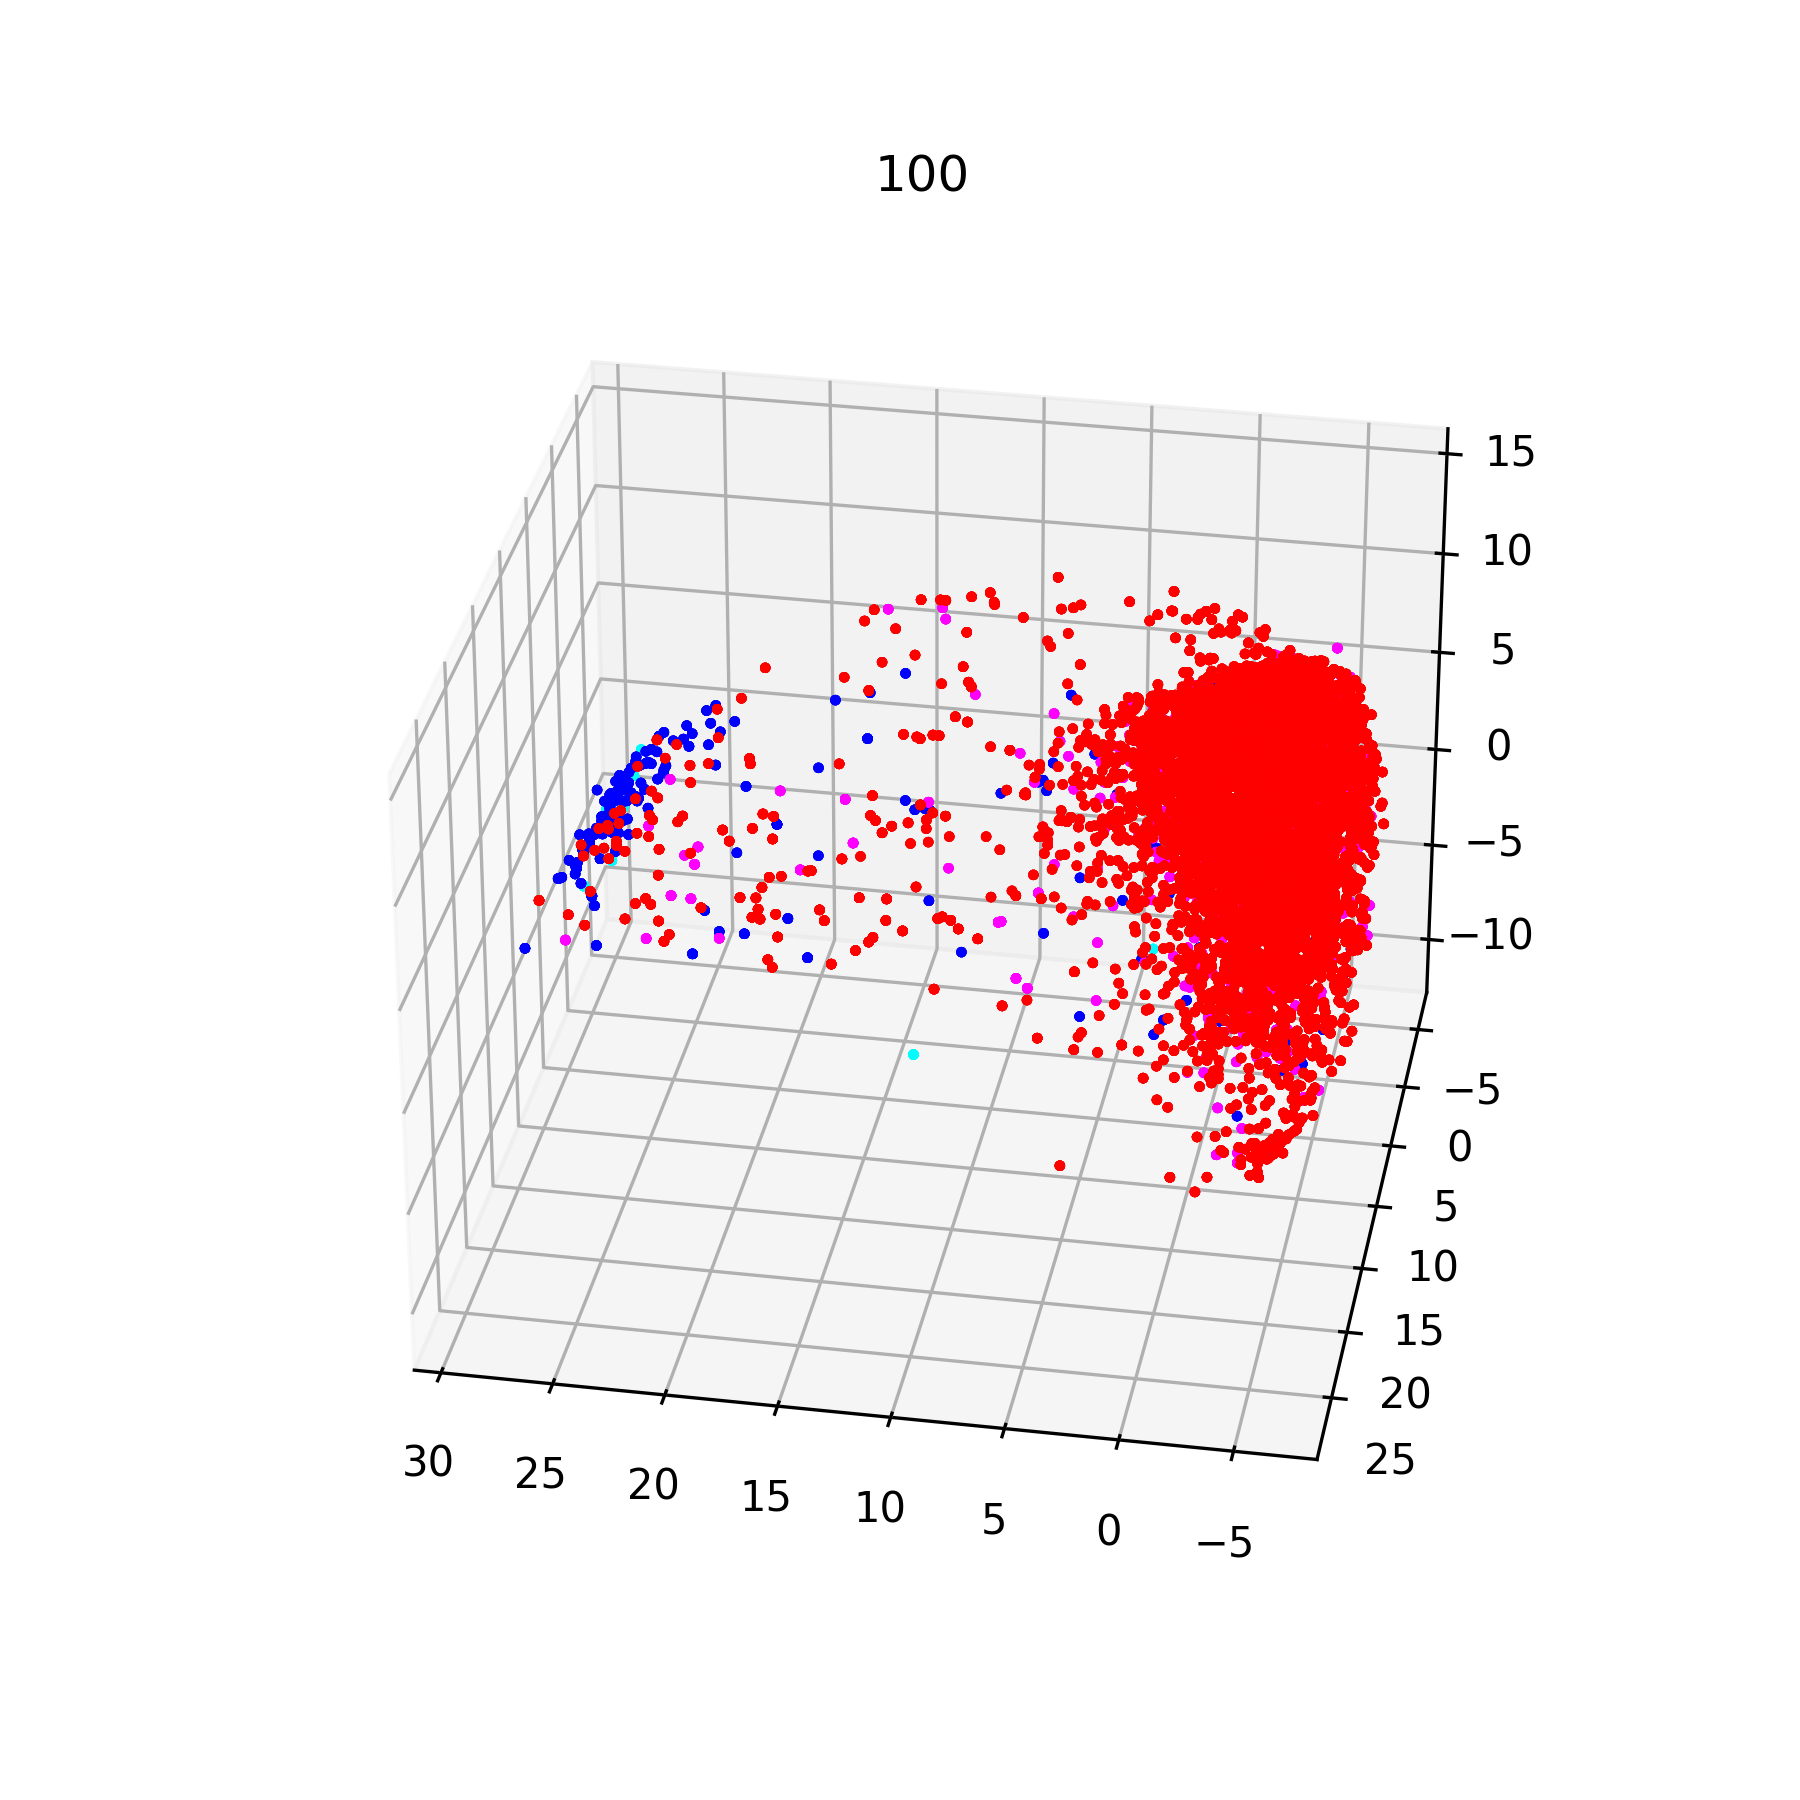

<IPython.core.display.Javascript object>


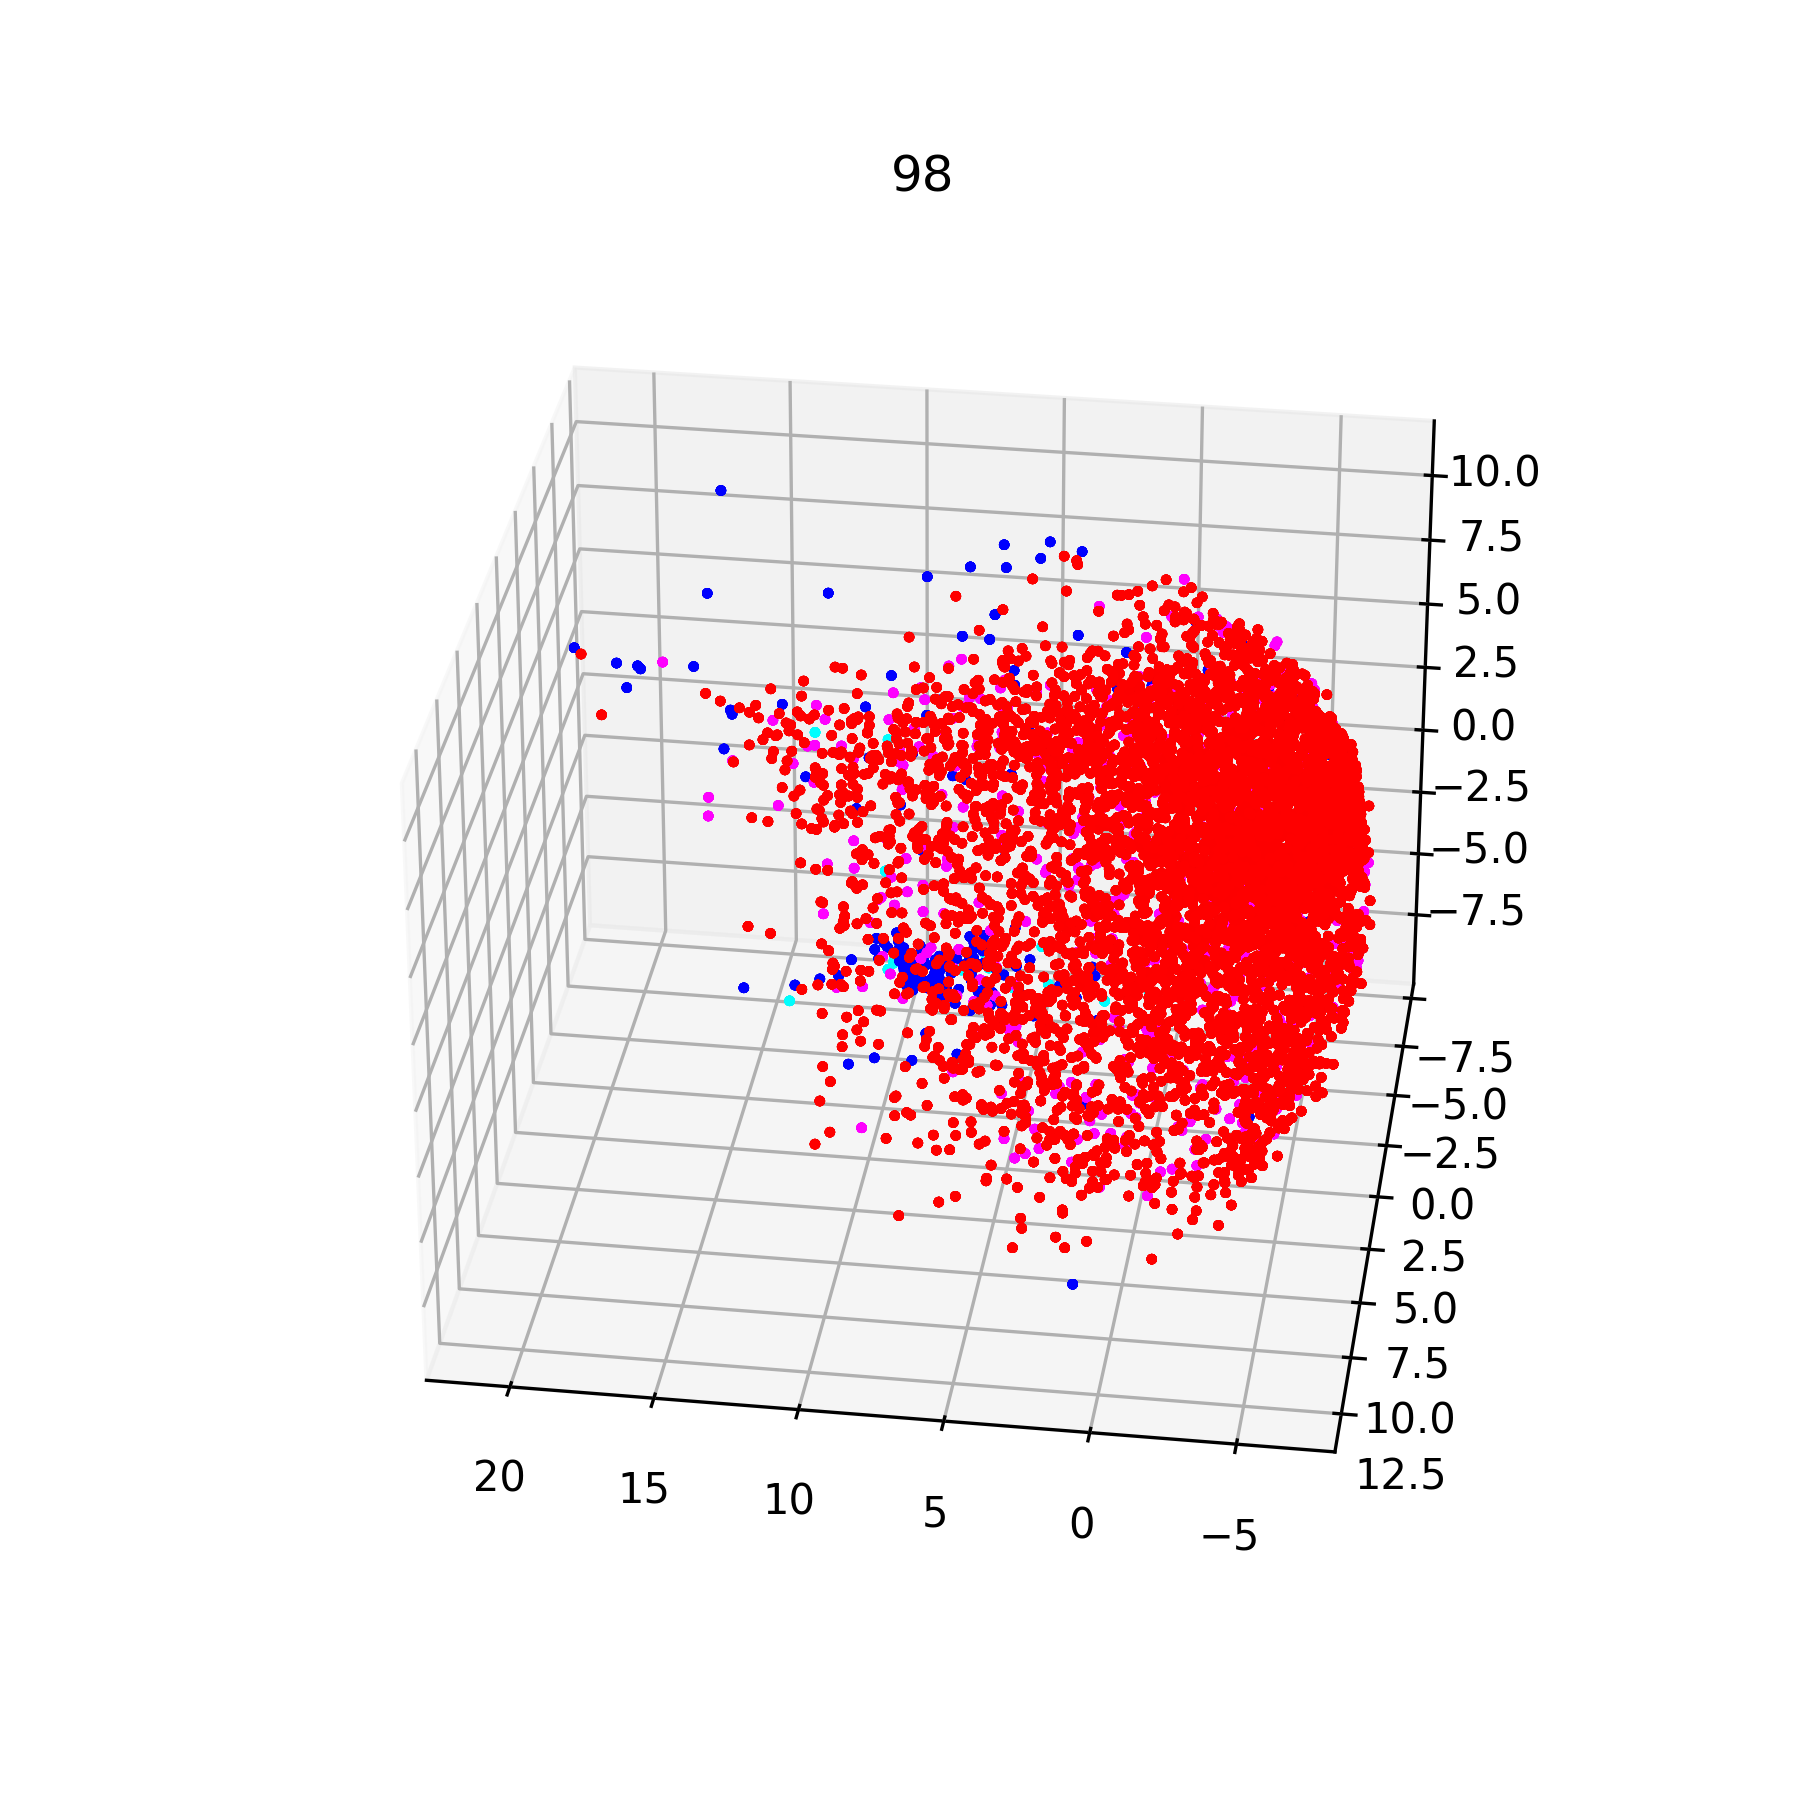

In [6]:
# animation
ani_single = draw_anim(singleDF)
ani_multi = draw_anim(multiDF)

<IPython.core.display.Javascript object>


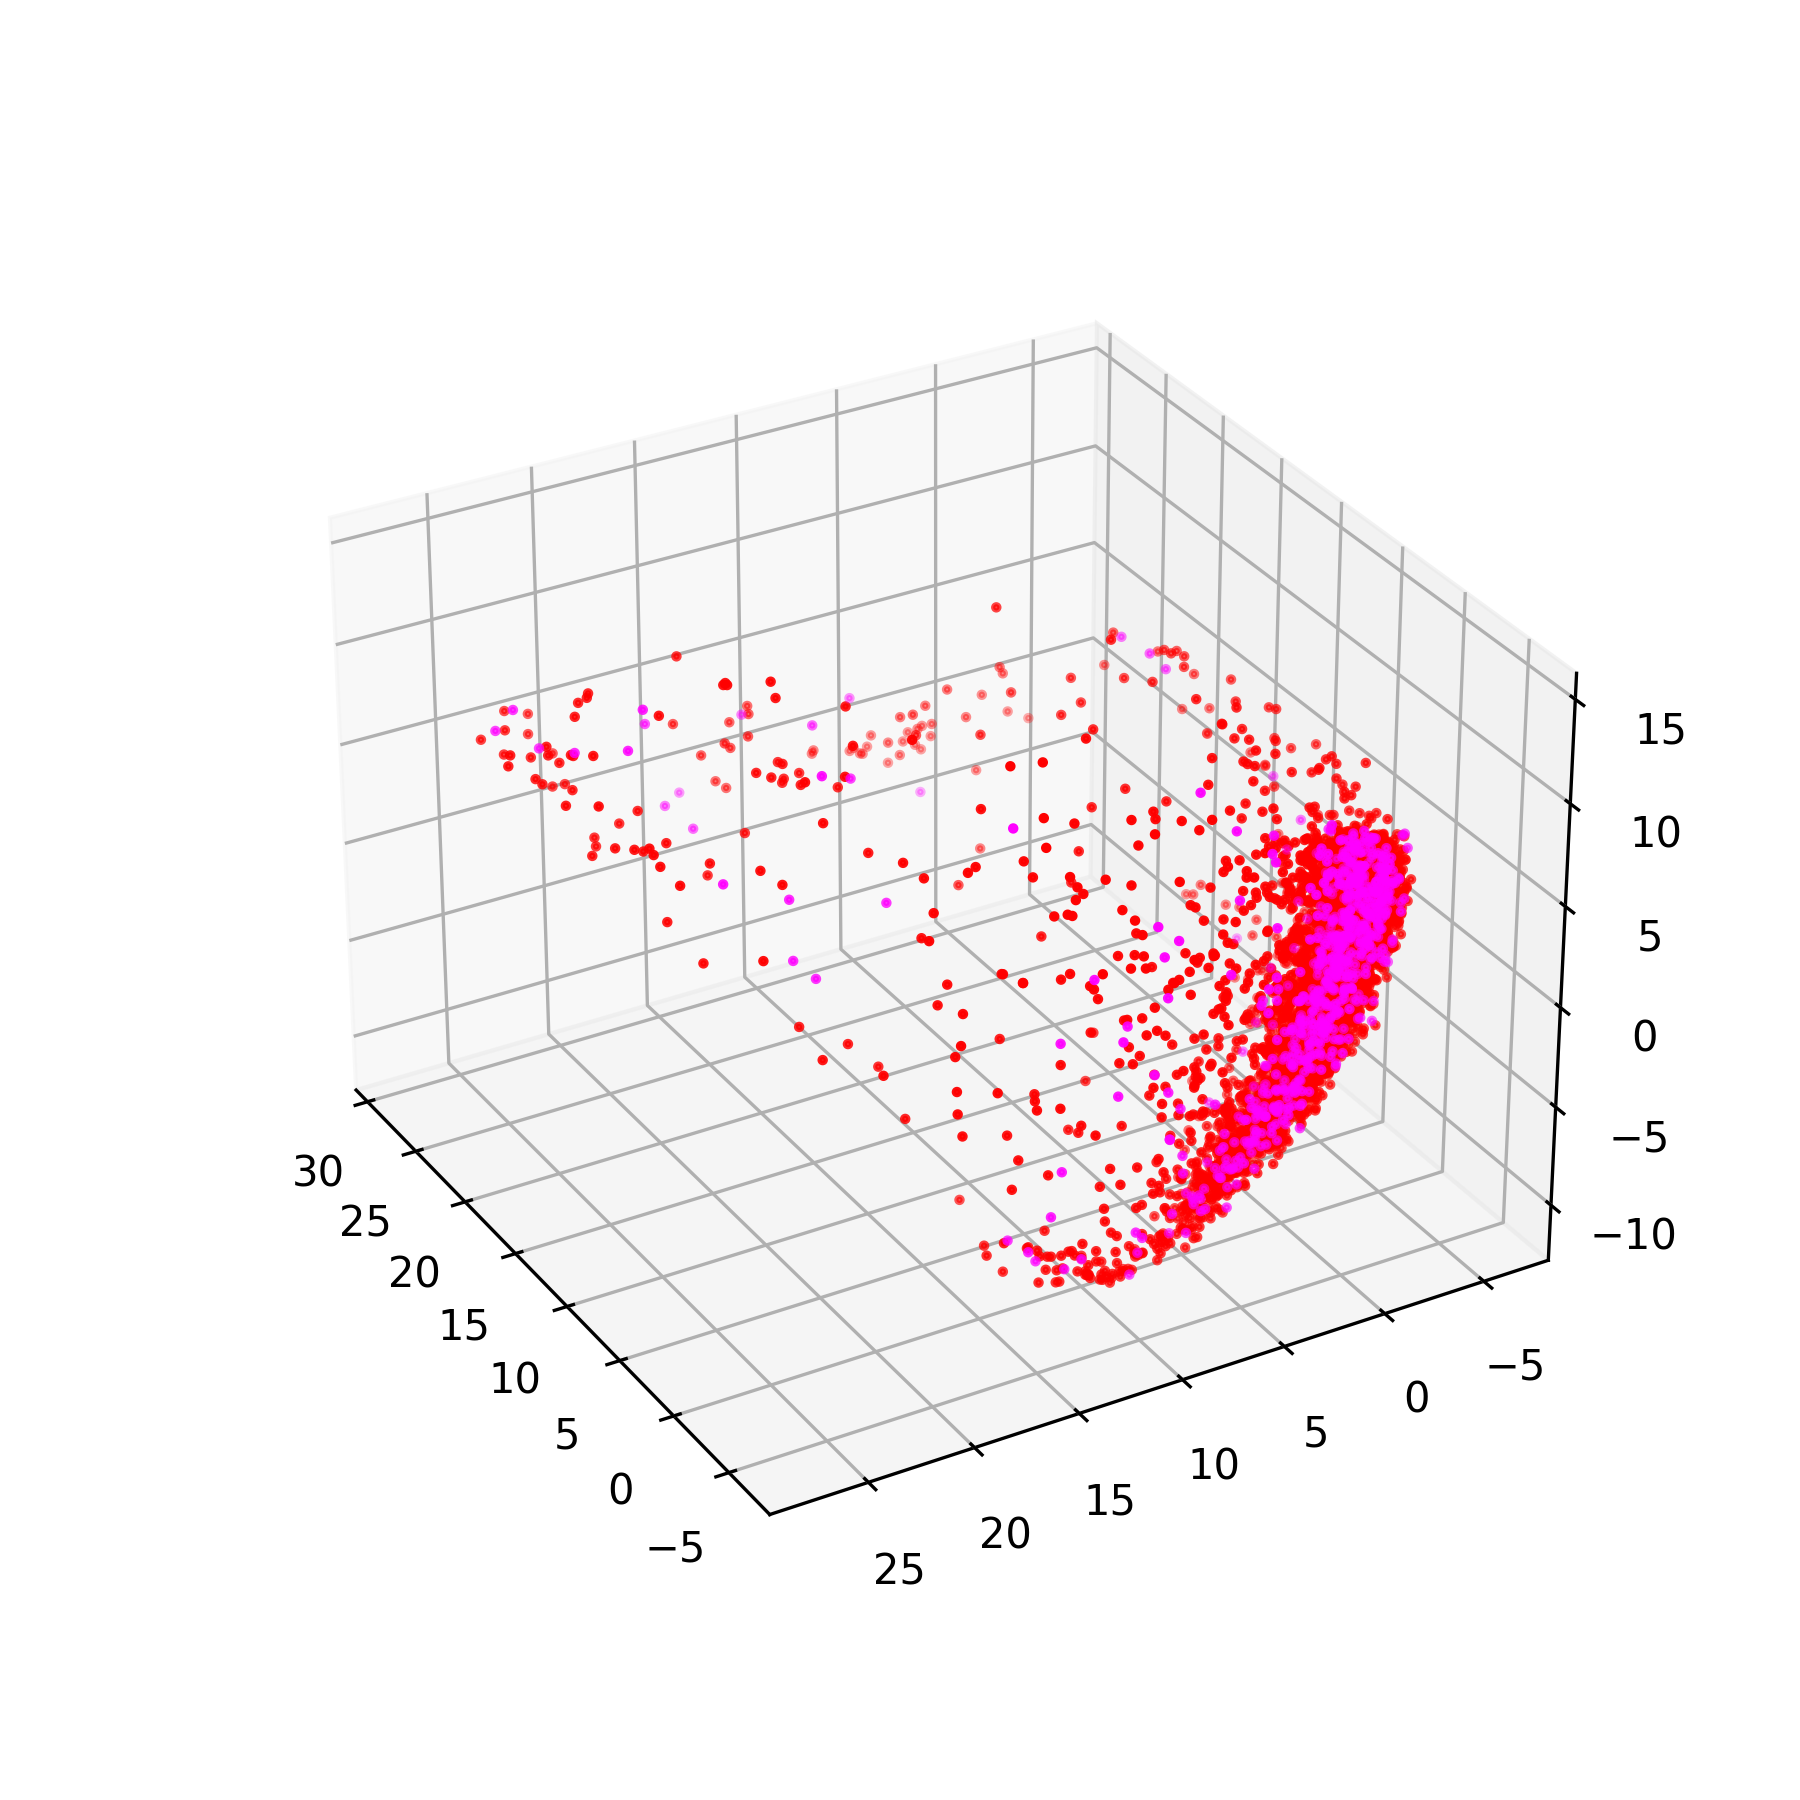

<IPython.core.display.Javascript object>


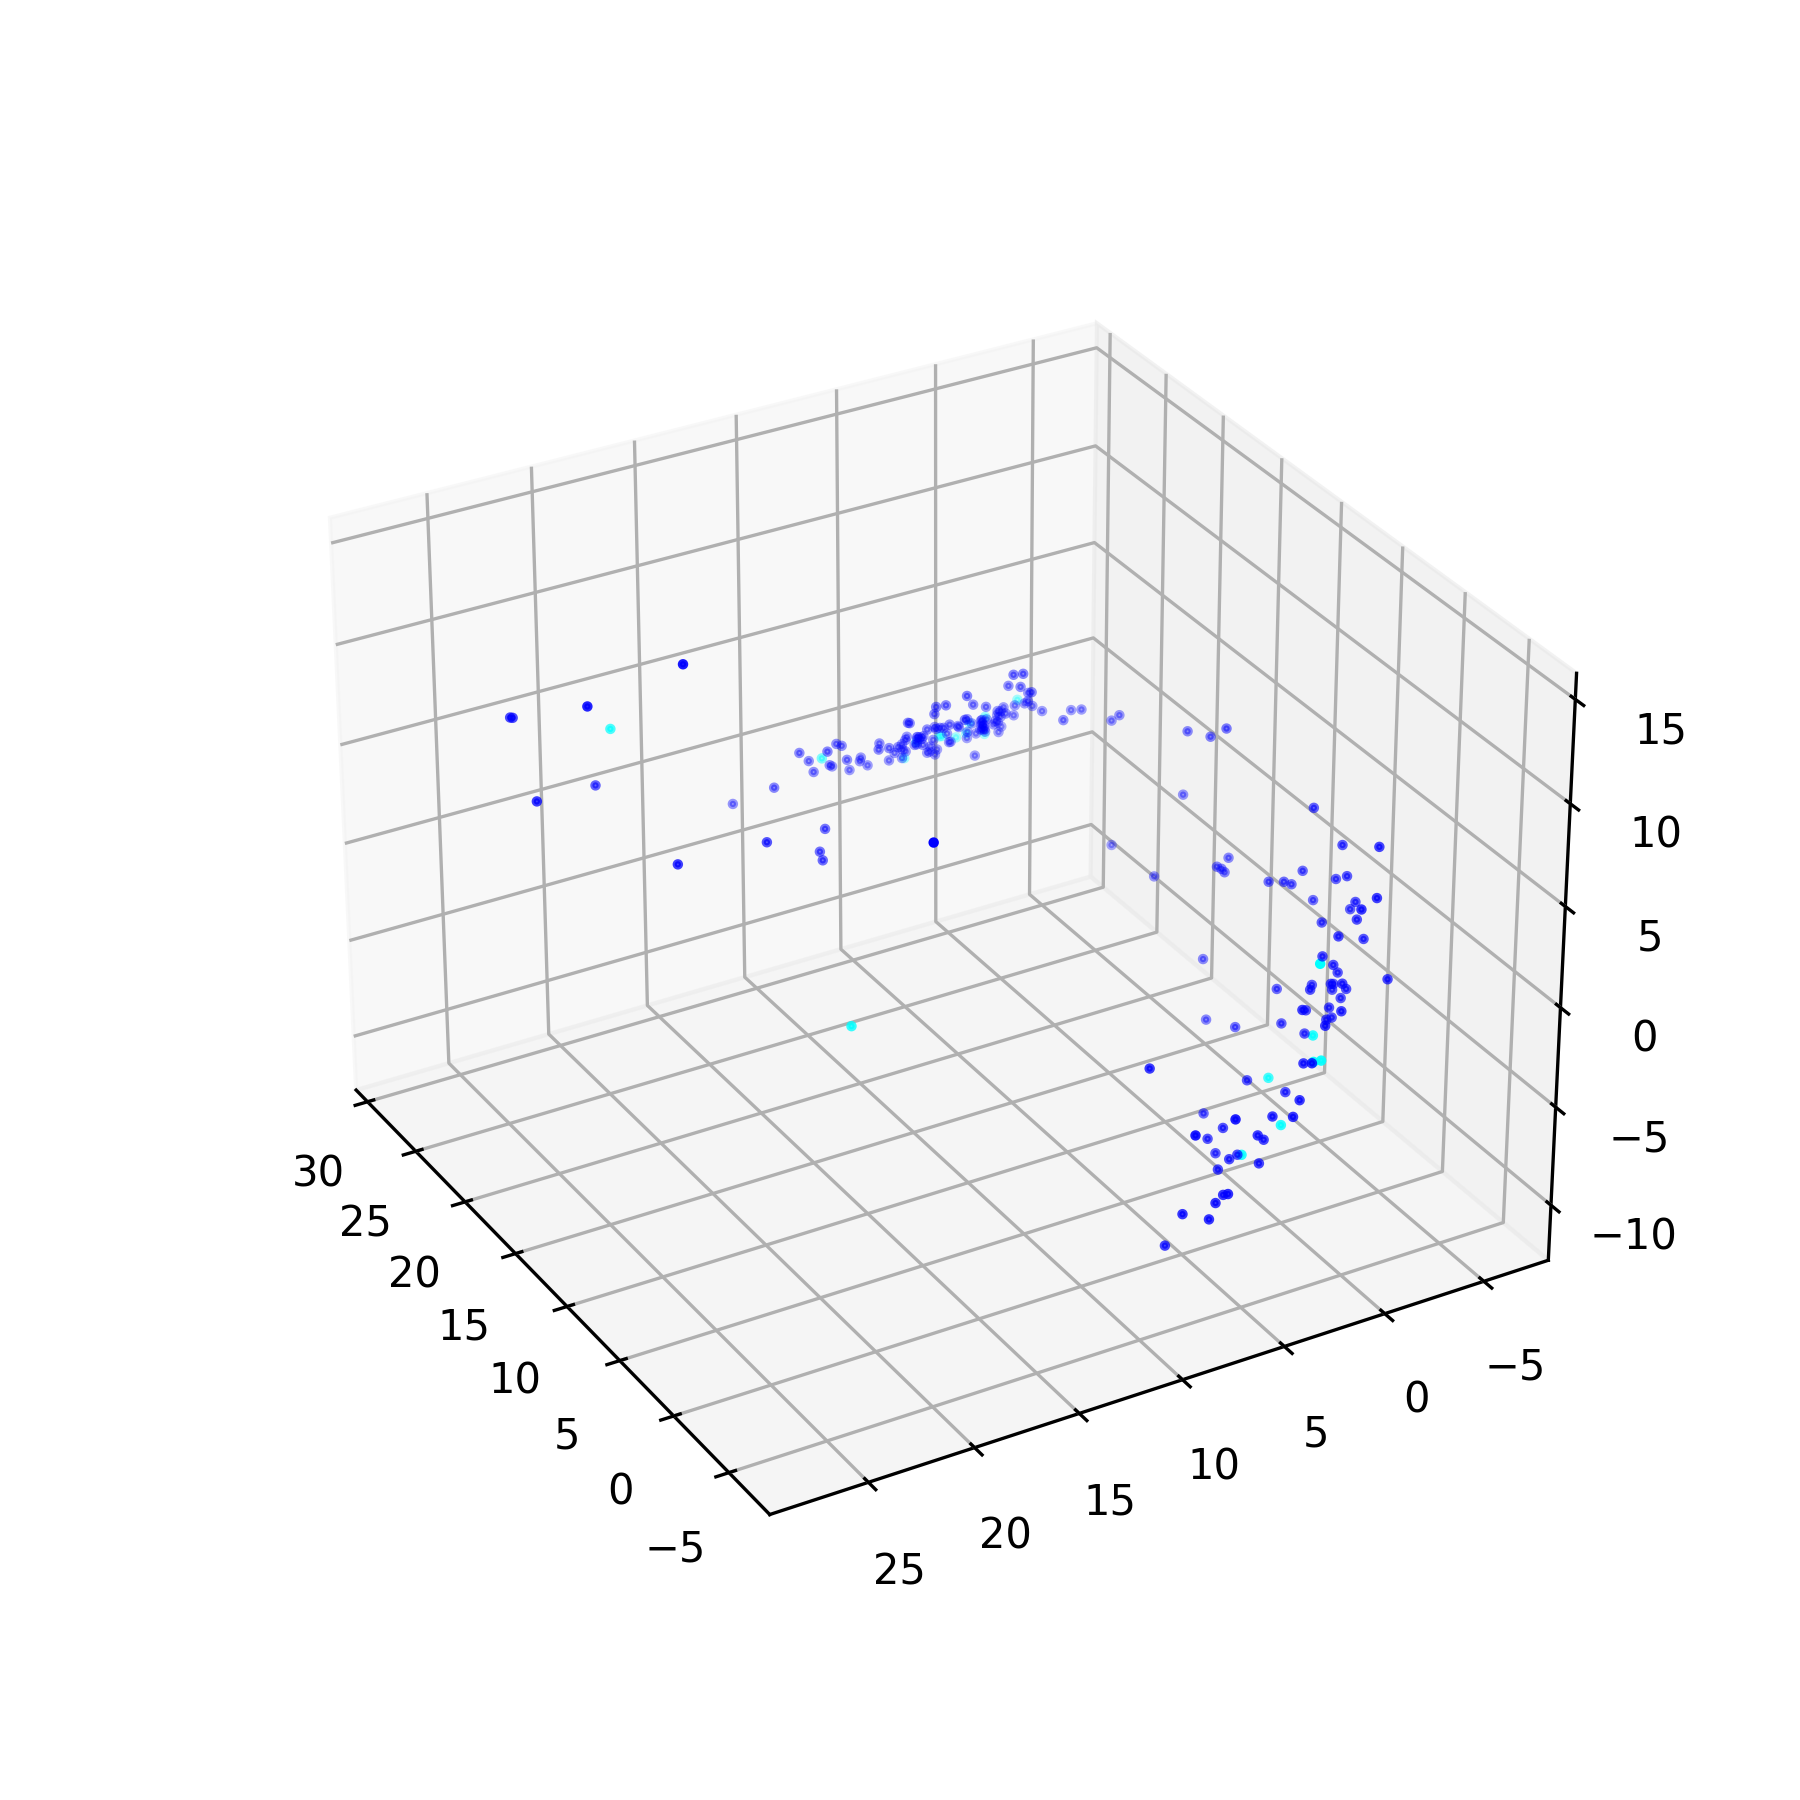

<IPython.core.display.Javascript object>


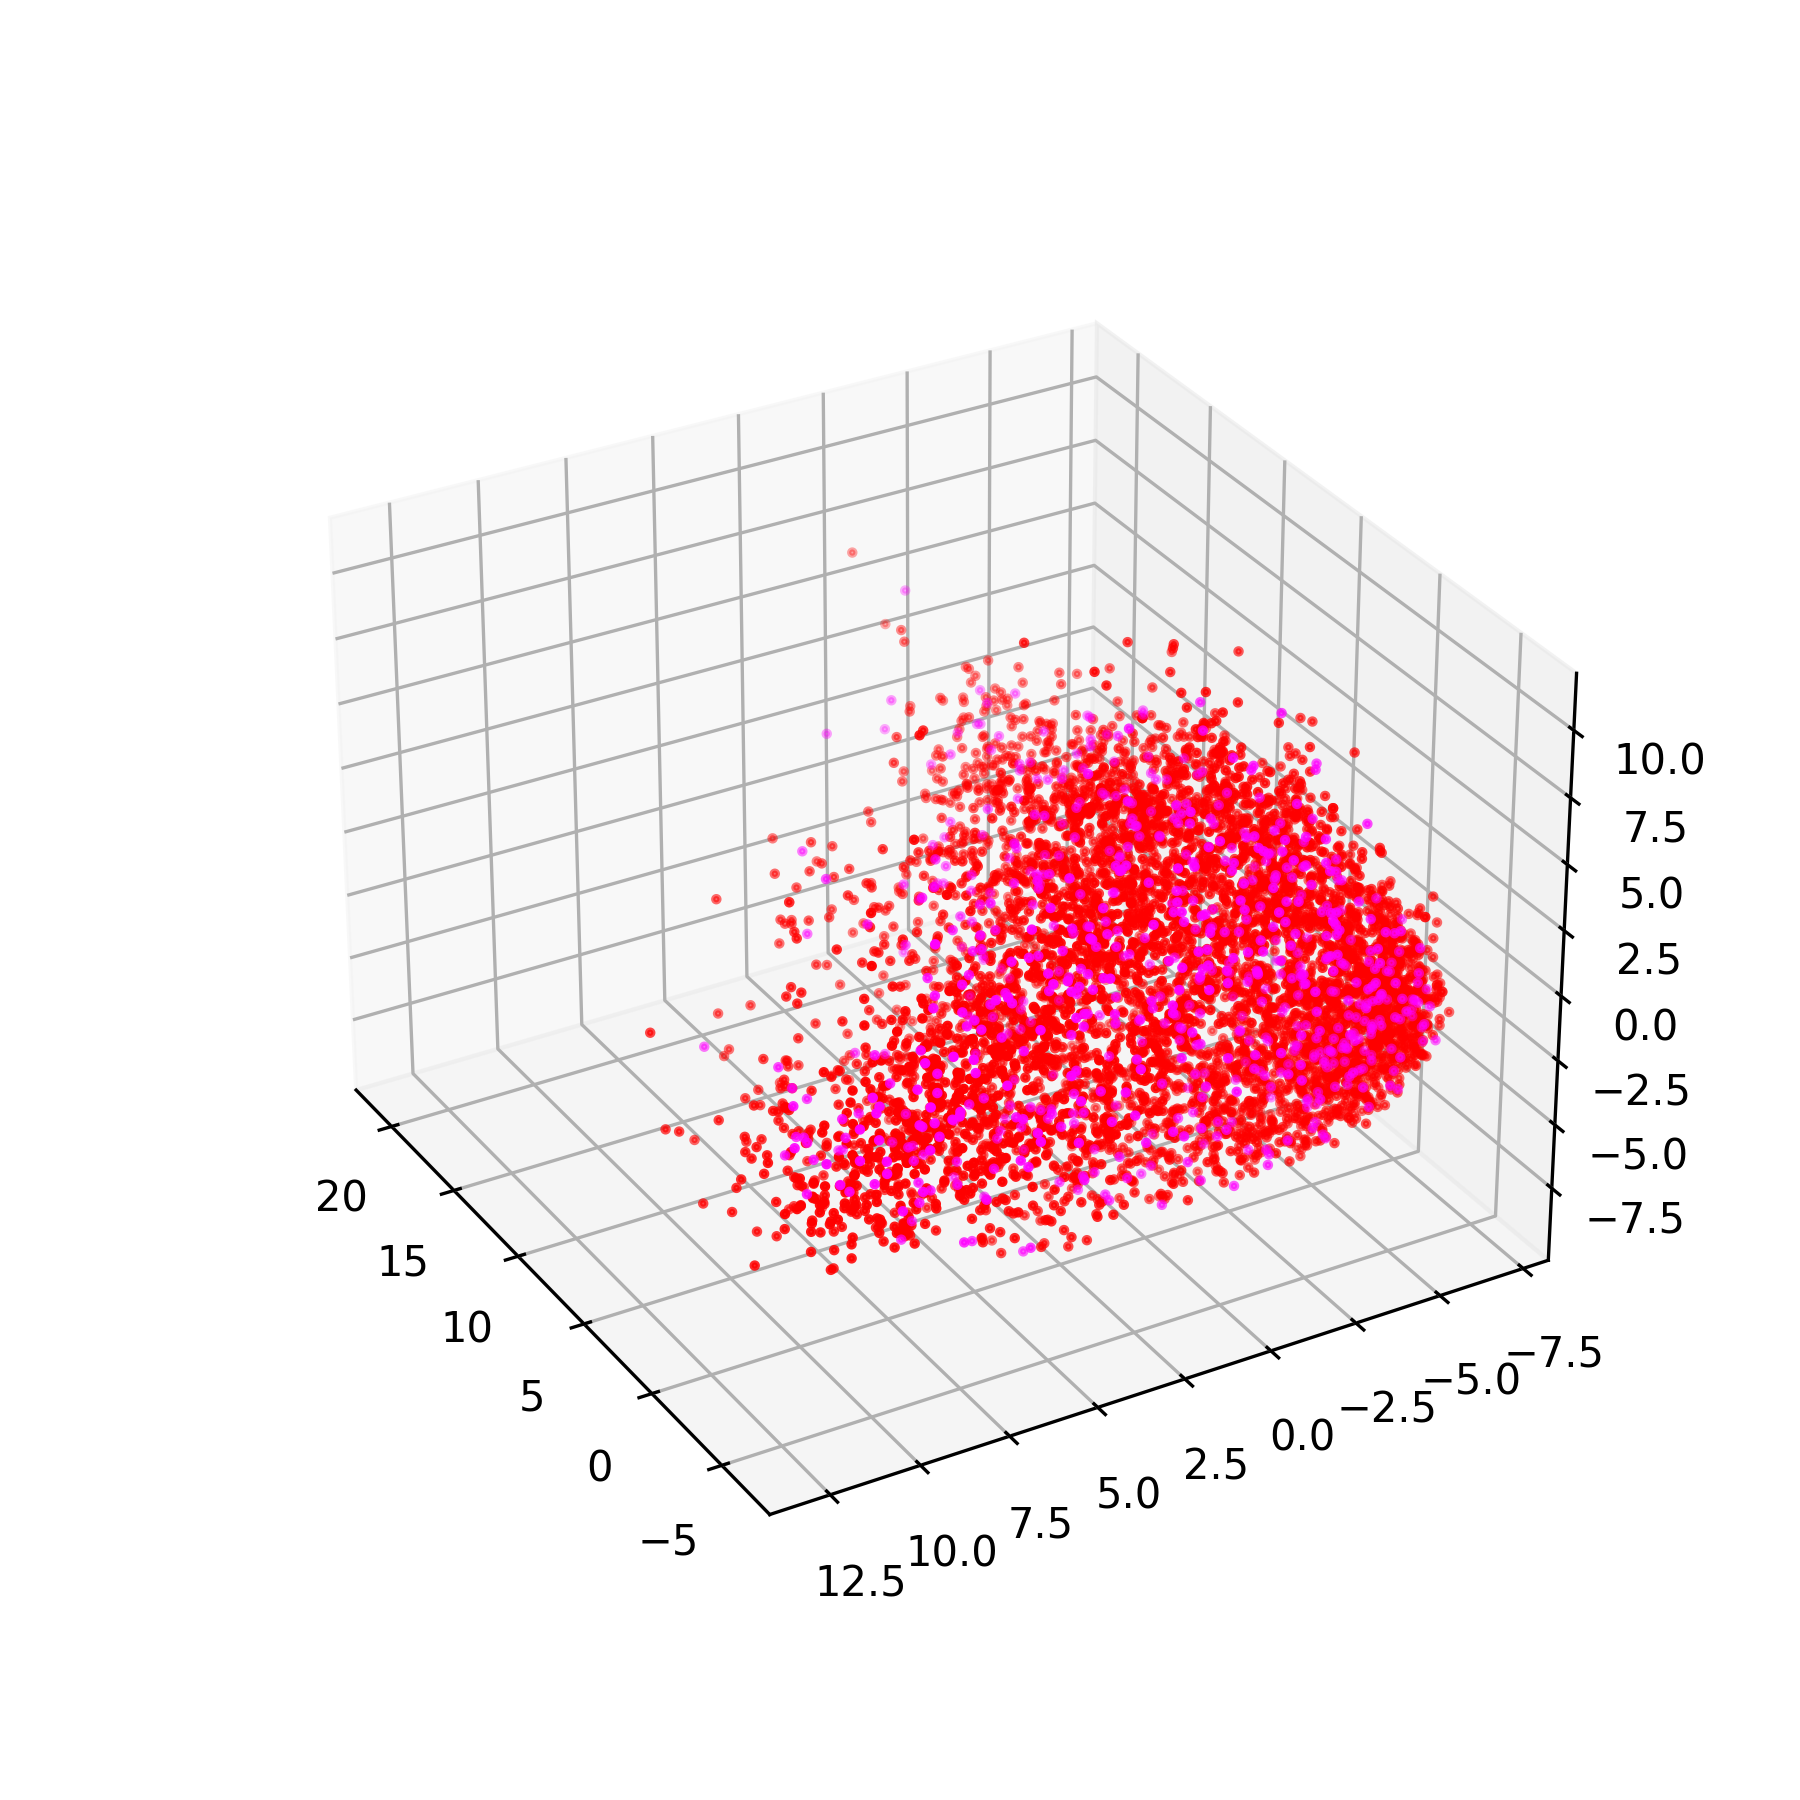

<IPython.core.display.Javascript object>


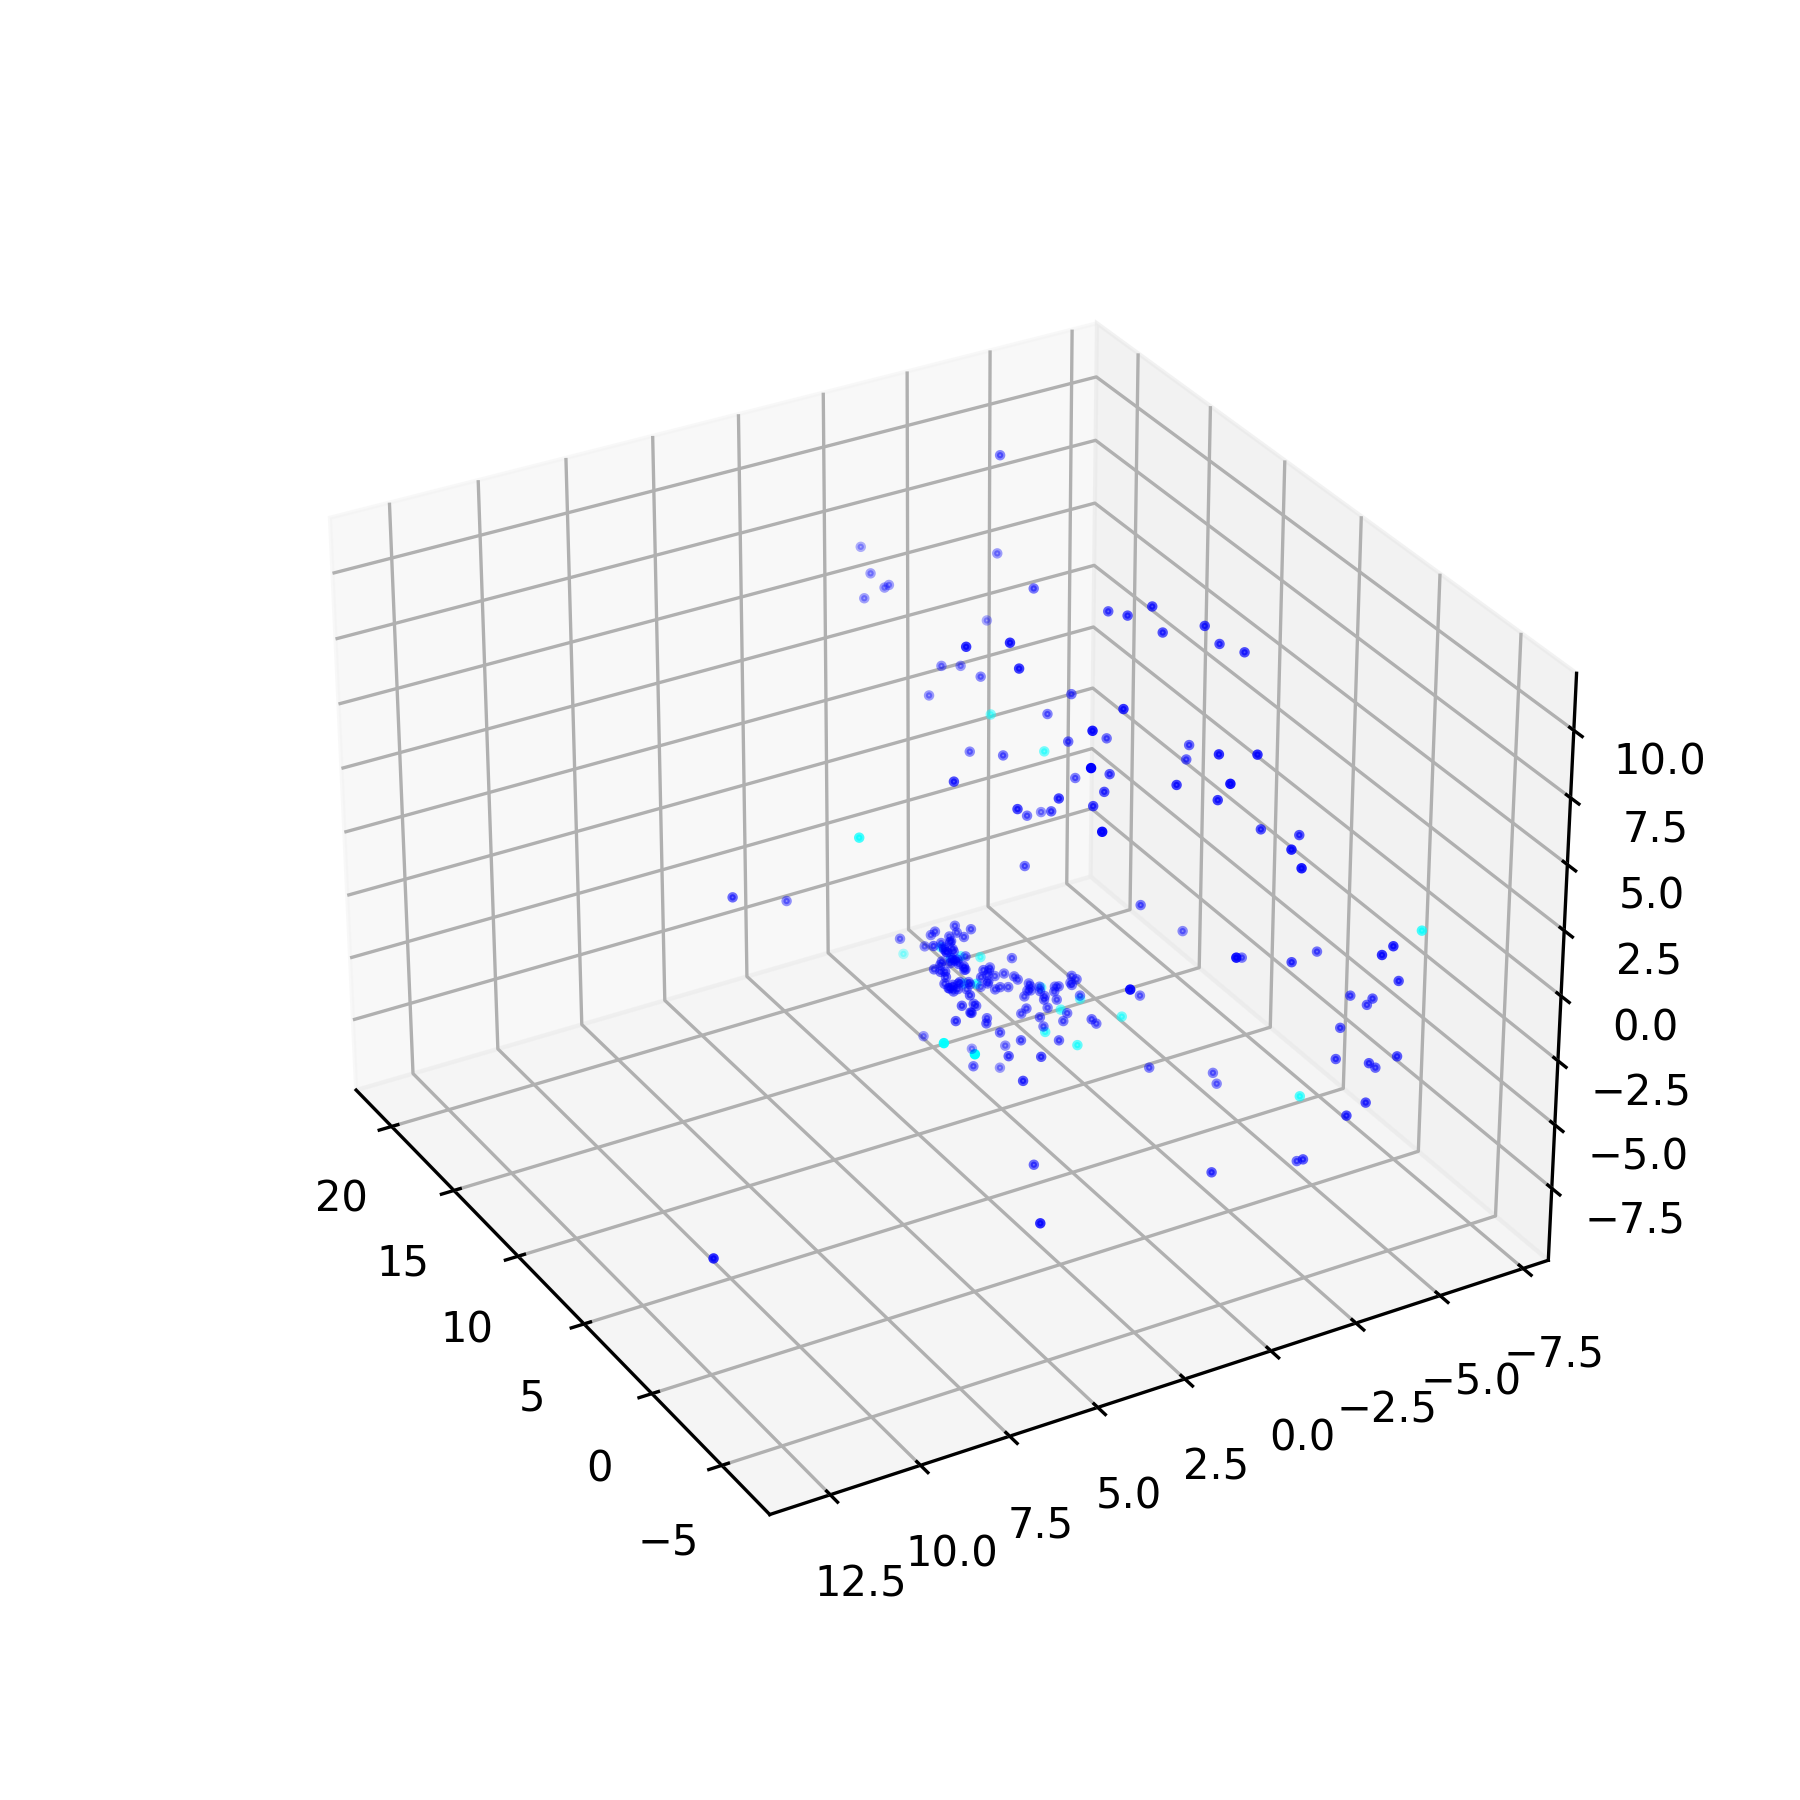

In [7]:
# picture
inactive_single, active_single = draw_same_label(singleDF, 150)
inactive_multi, active_multi = draw_same_label(multiDF, 150)

<IPython.core.display.Javascript object>


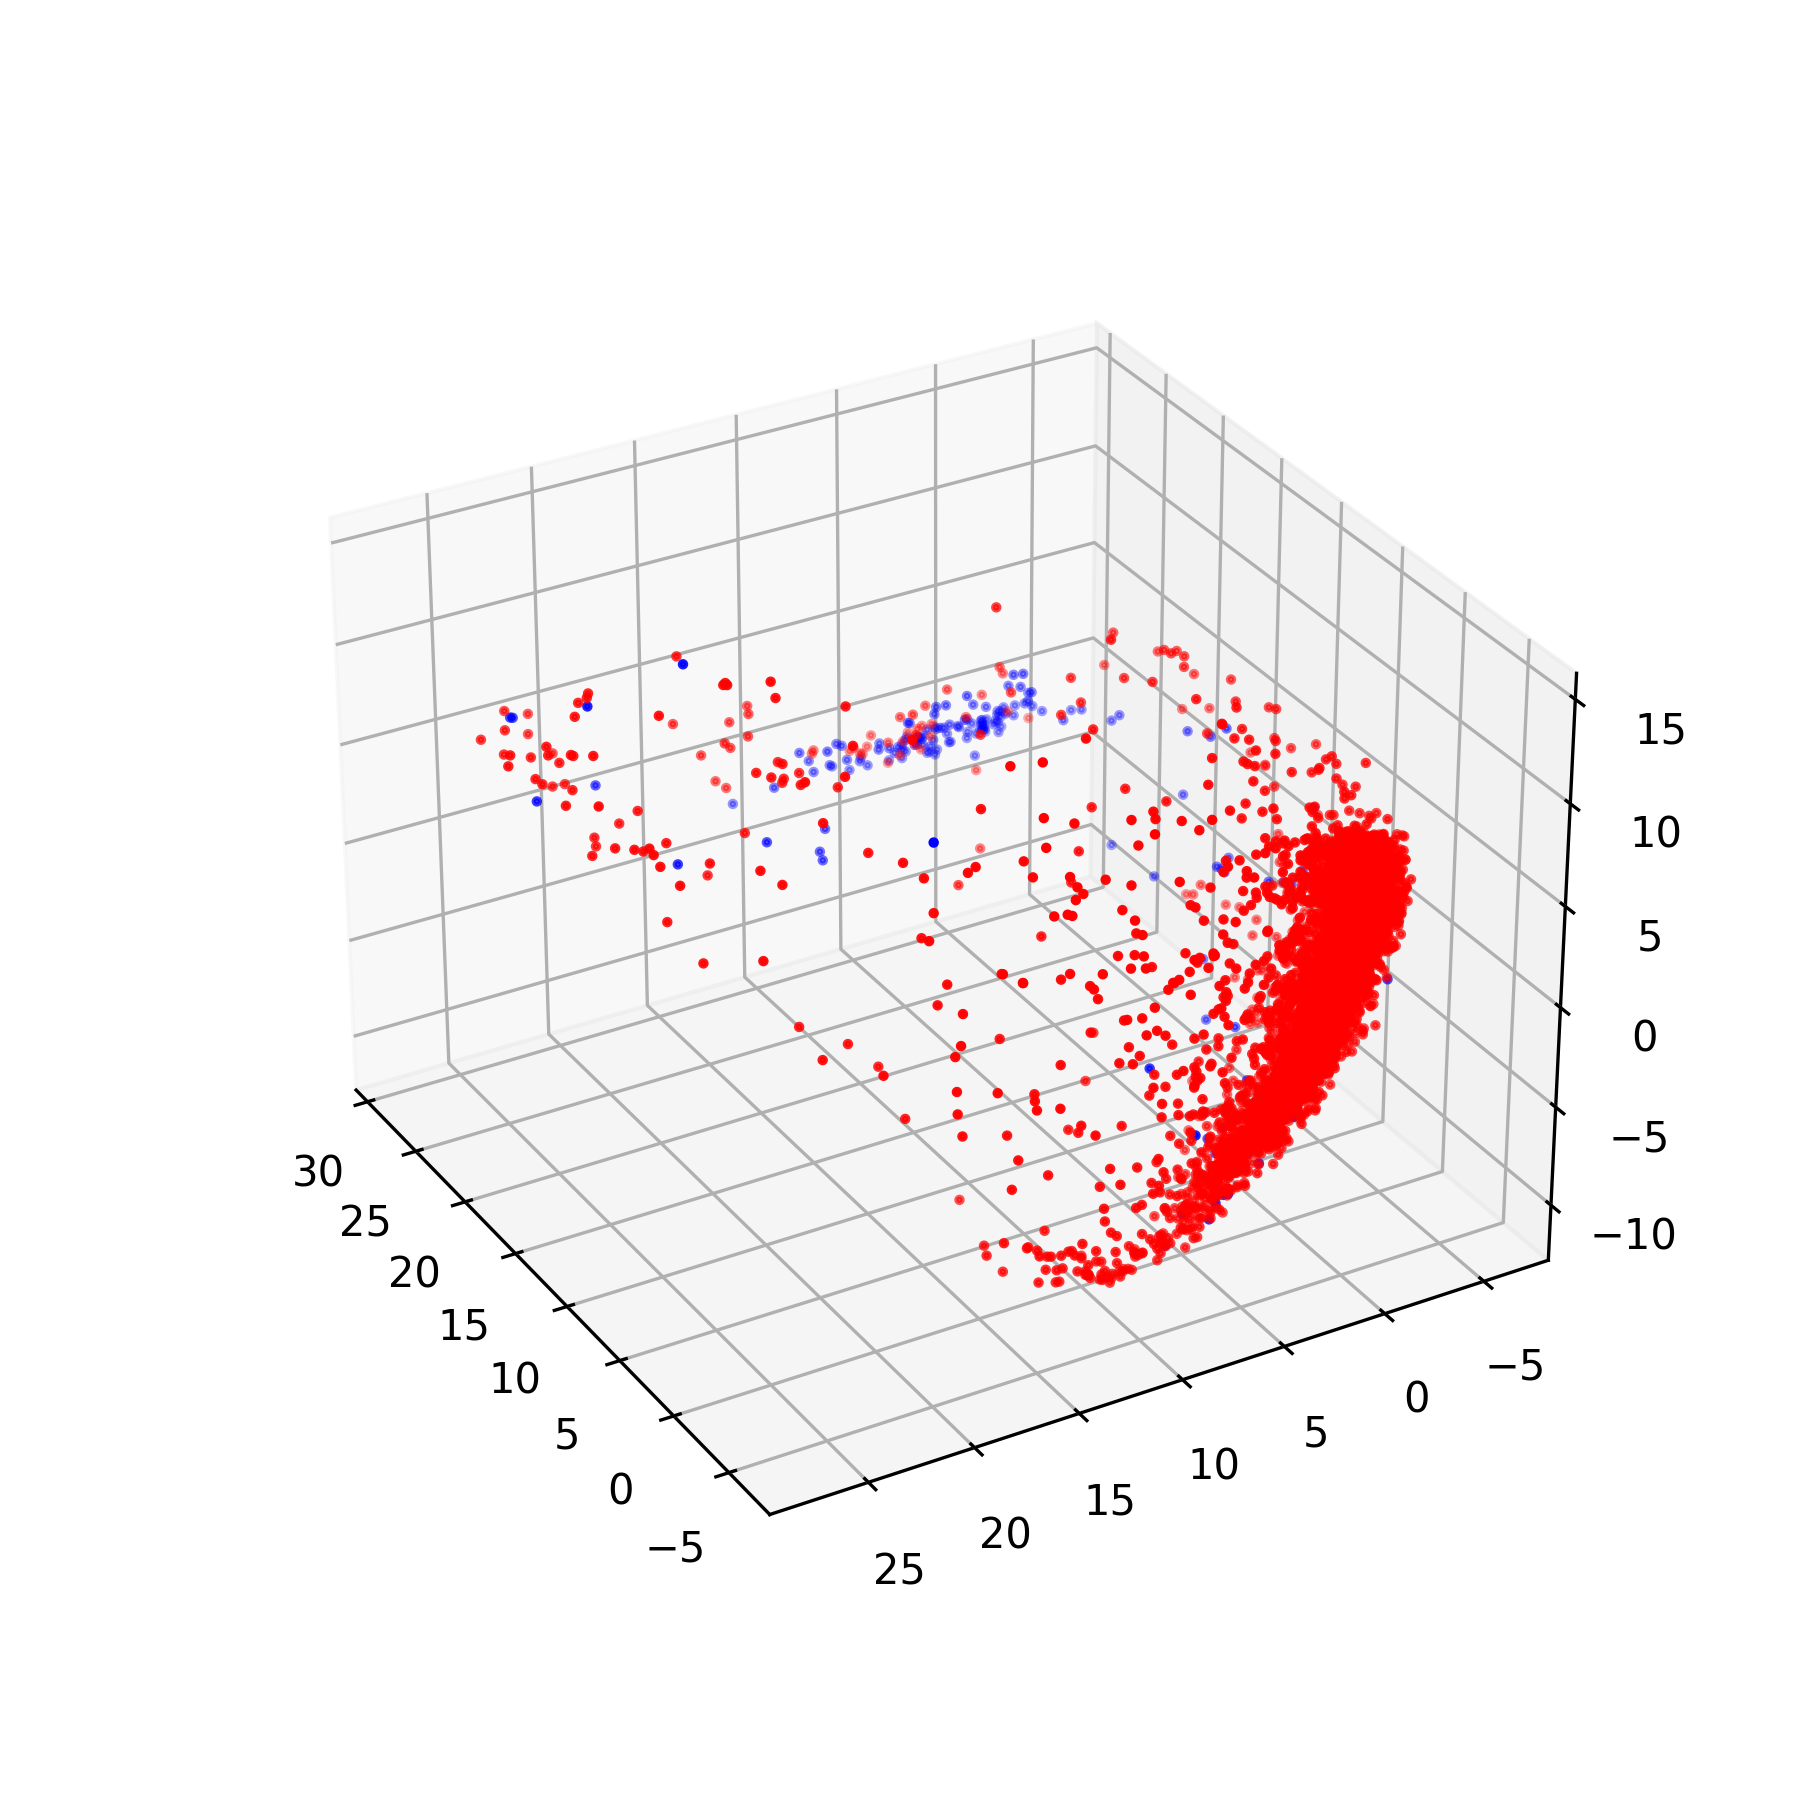

<IPython.core.display.Javascript object>


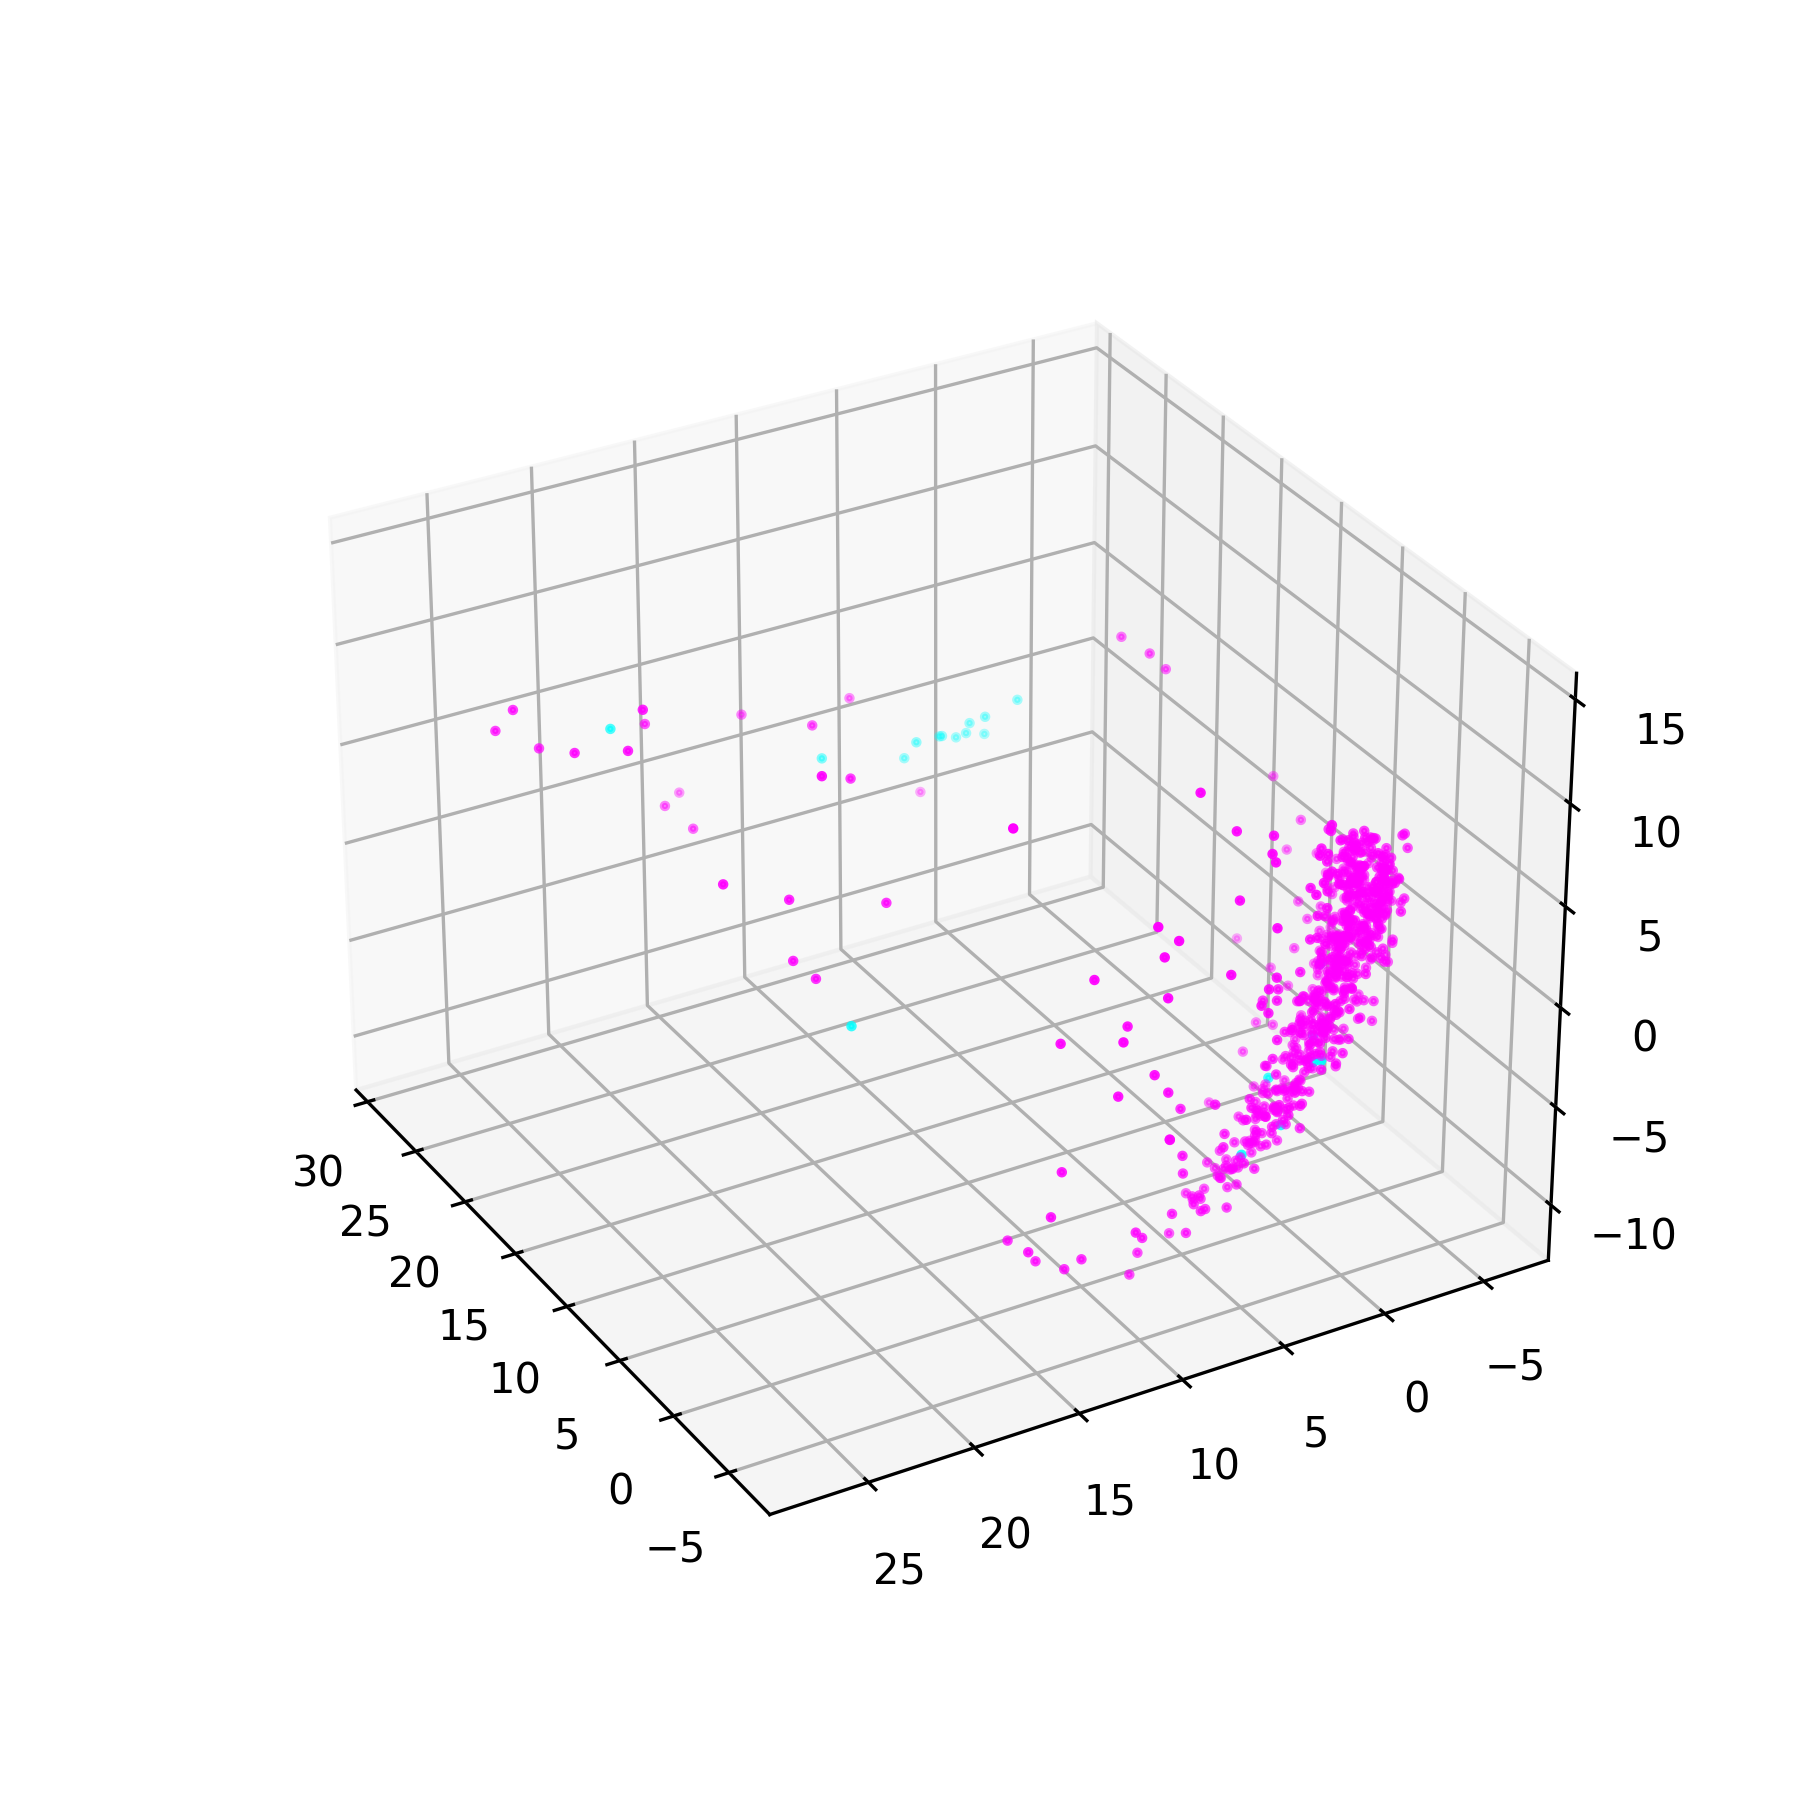

<IPython.core.display.Javascript object>


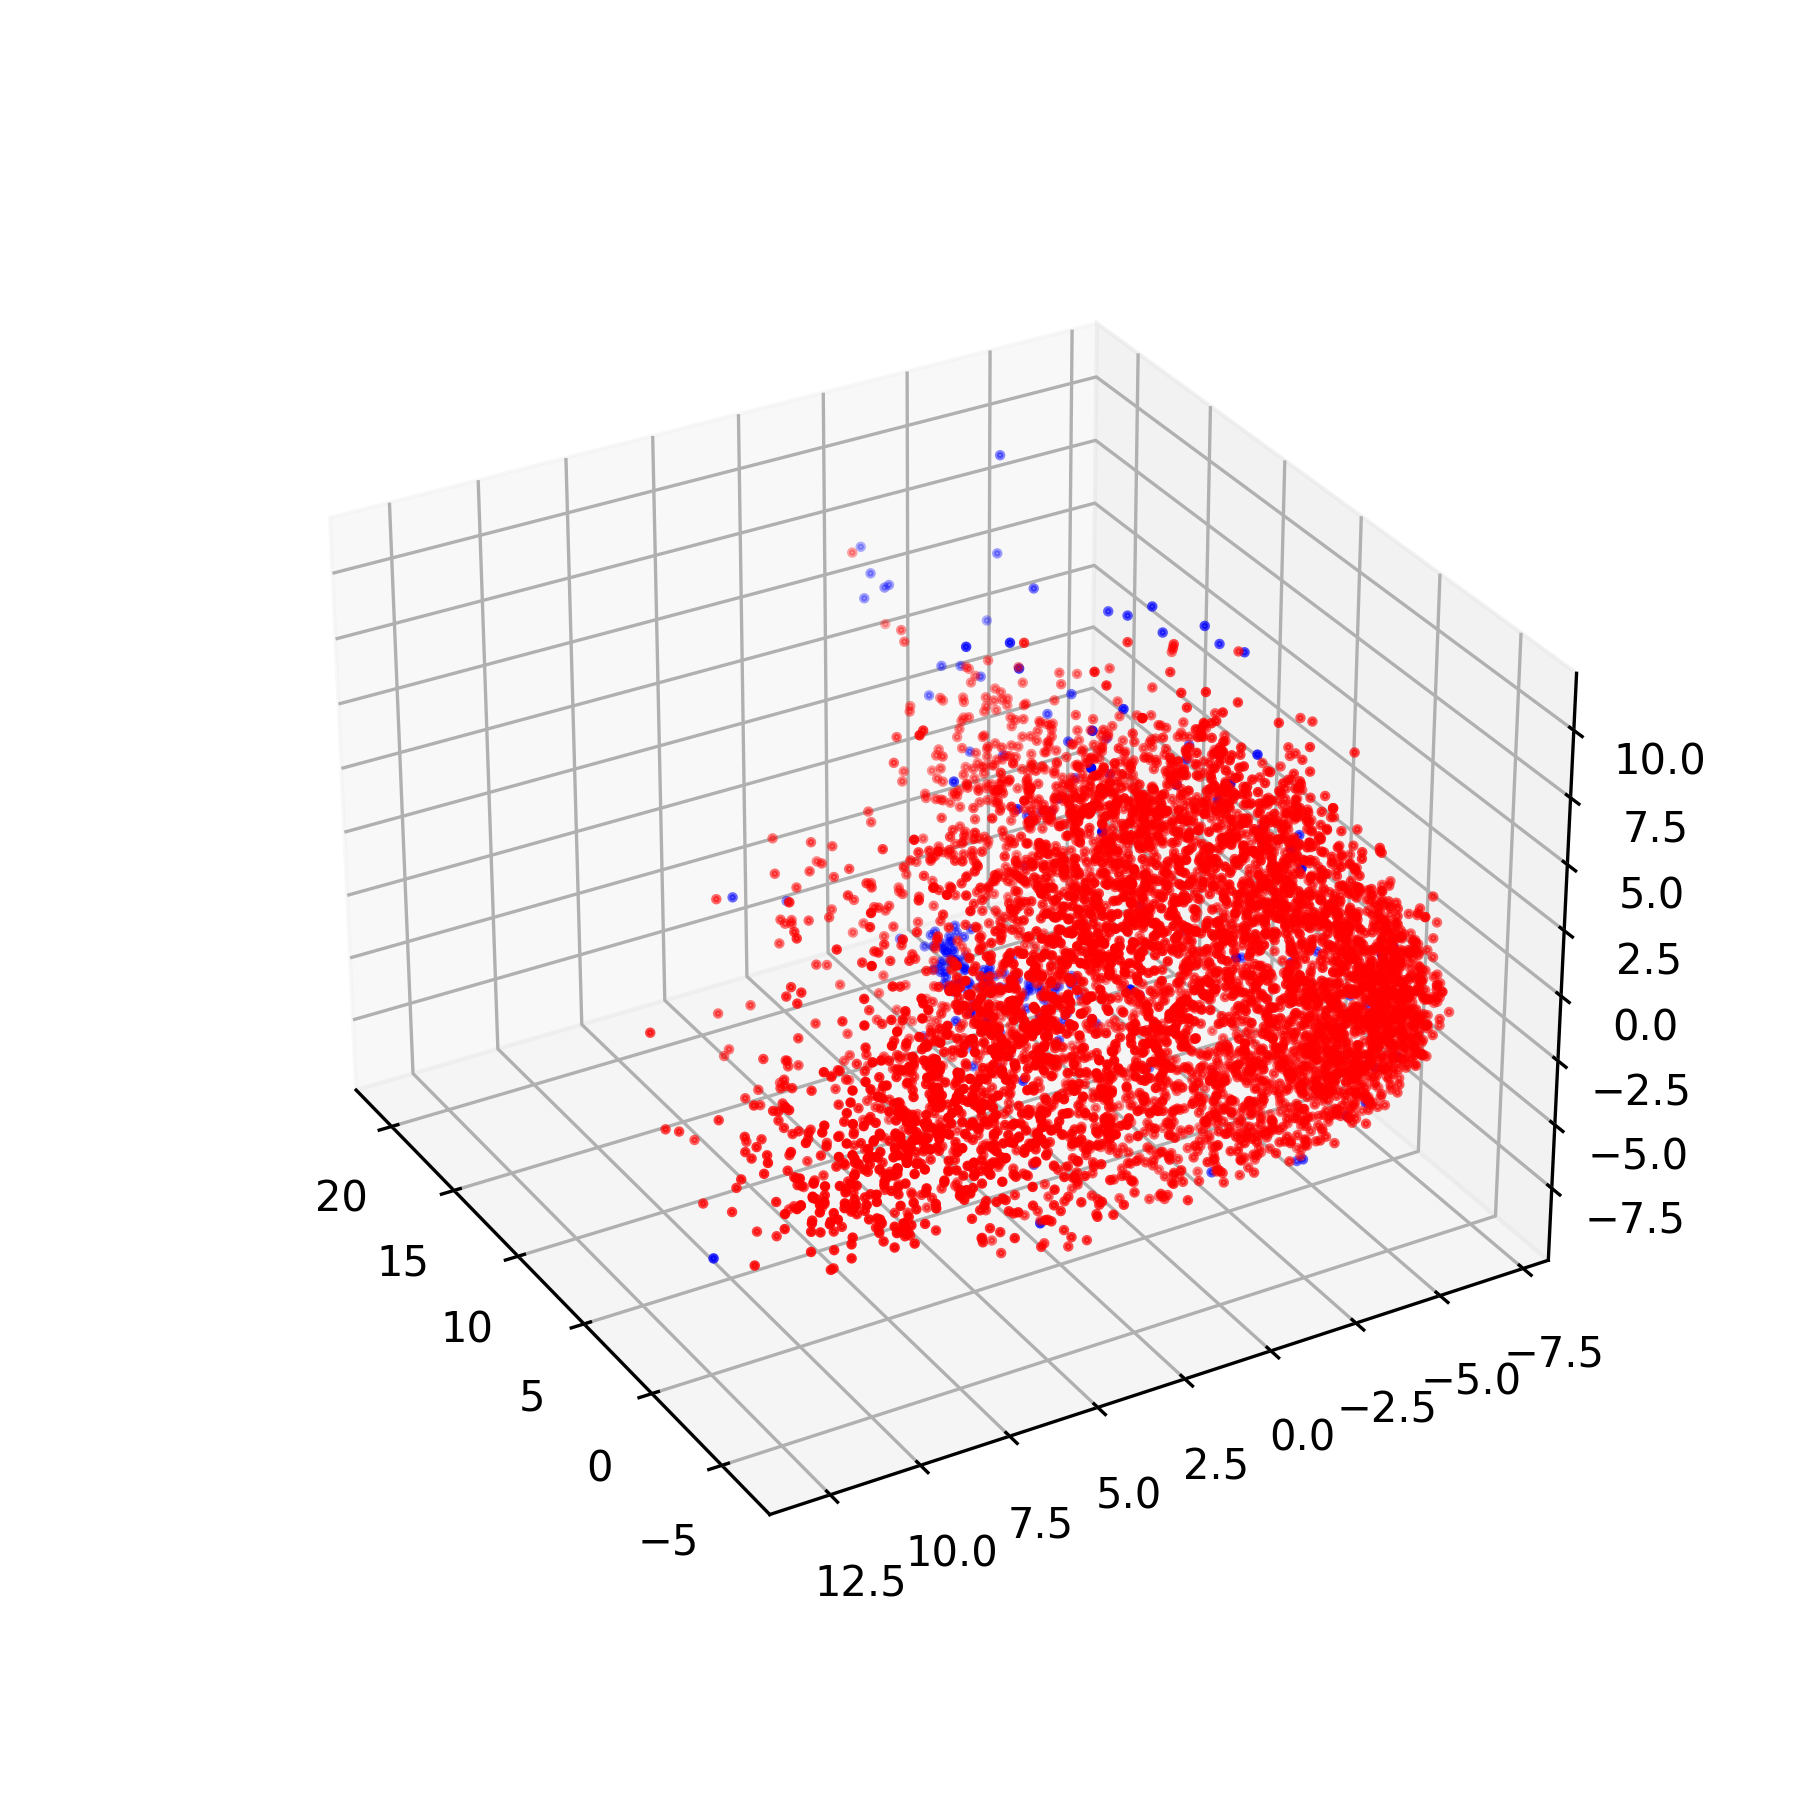

<IPython.core.display.Javascript object>


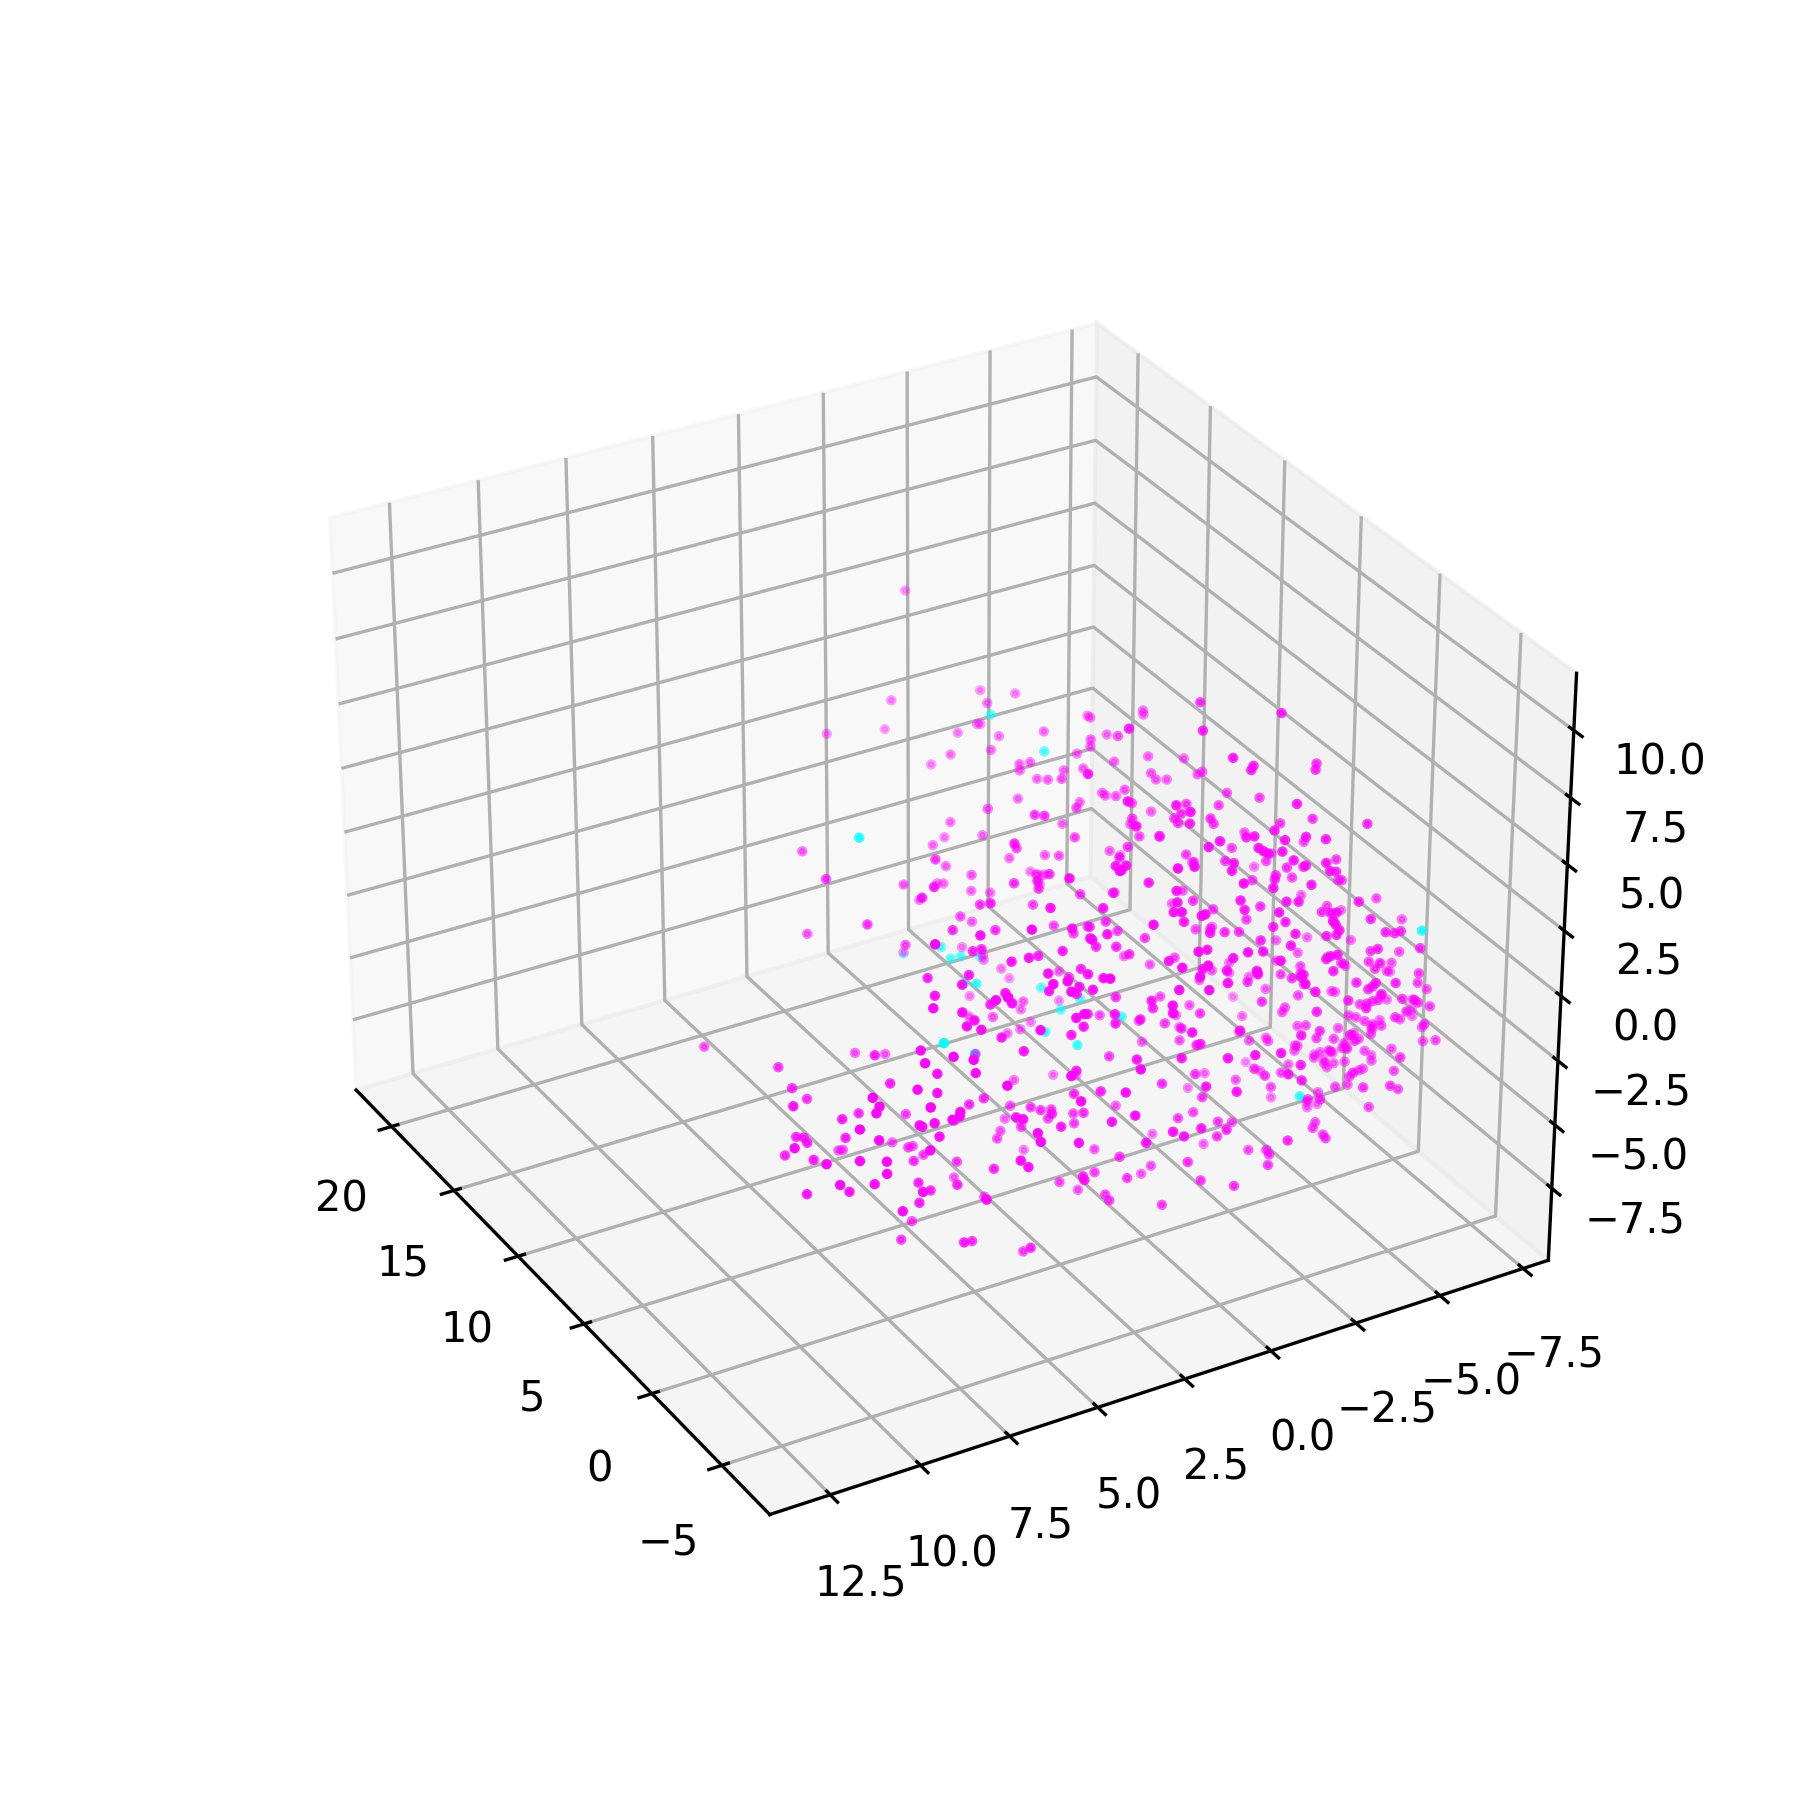

In [8]:
# picture
train_single, test_single = draw_same_domain(singleDF, 150)
train_multi, test_multi = draw_same_domain(multiDF, 150)

<IPython.core.display.Javascript object>


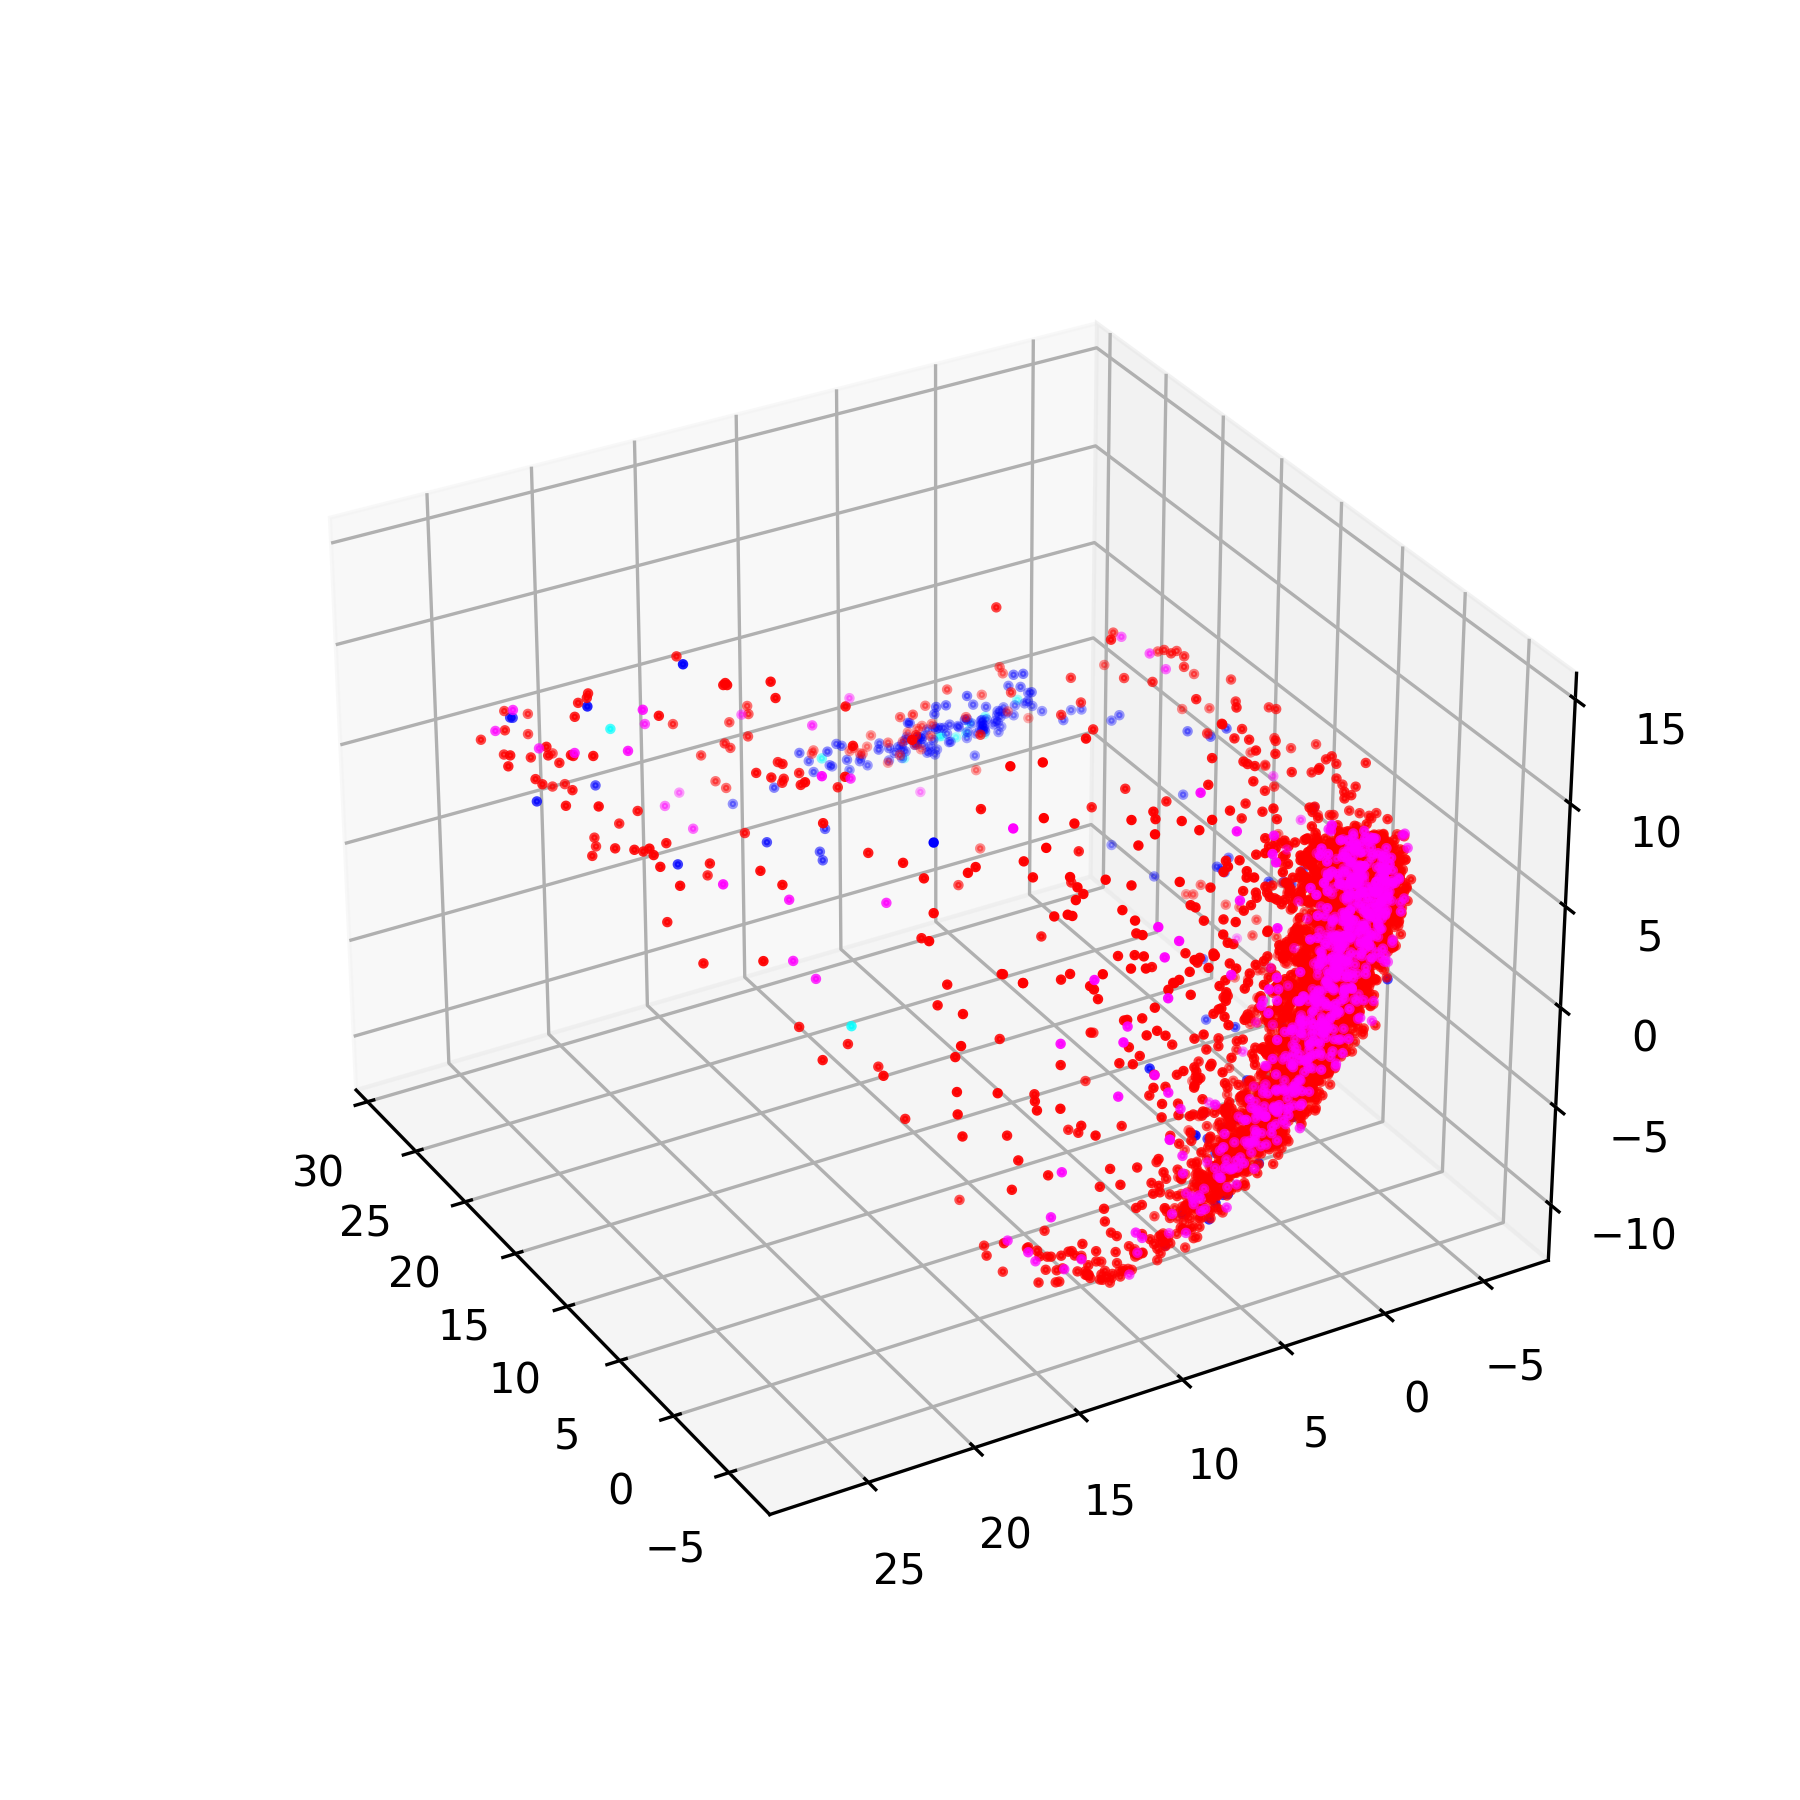

<IPython.core.display.Javascript object>


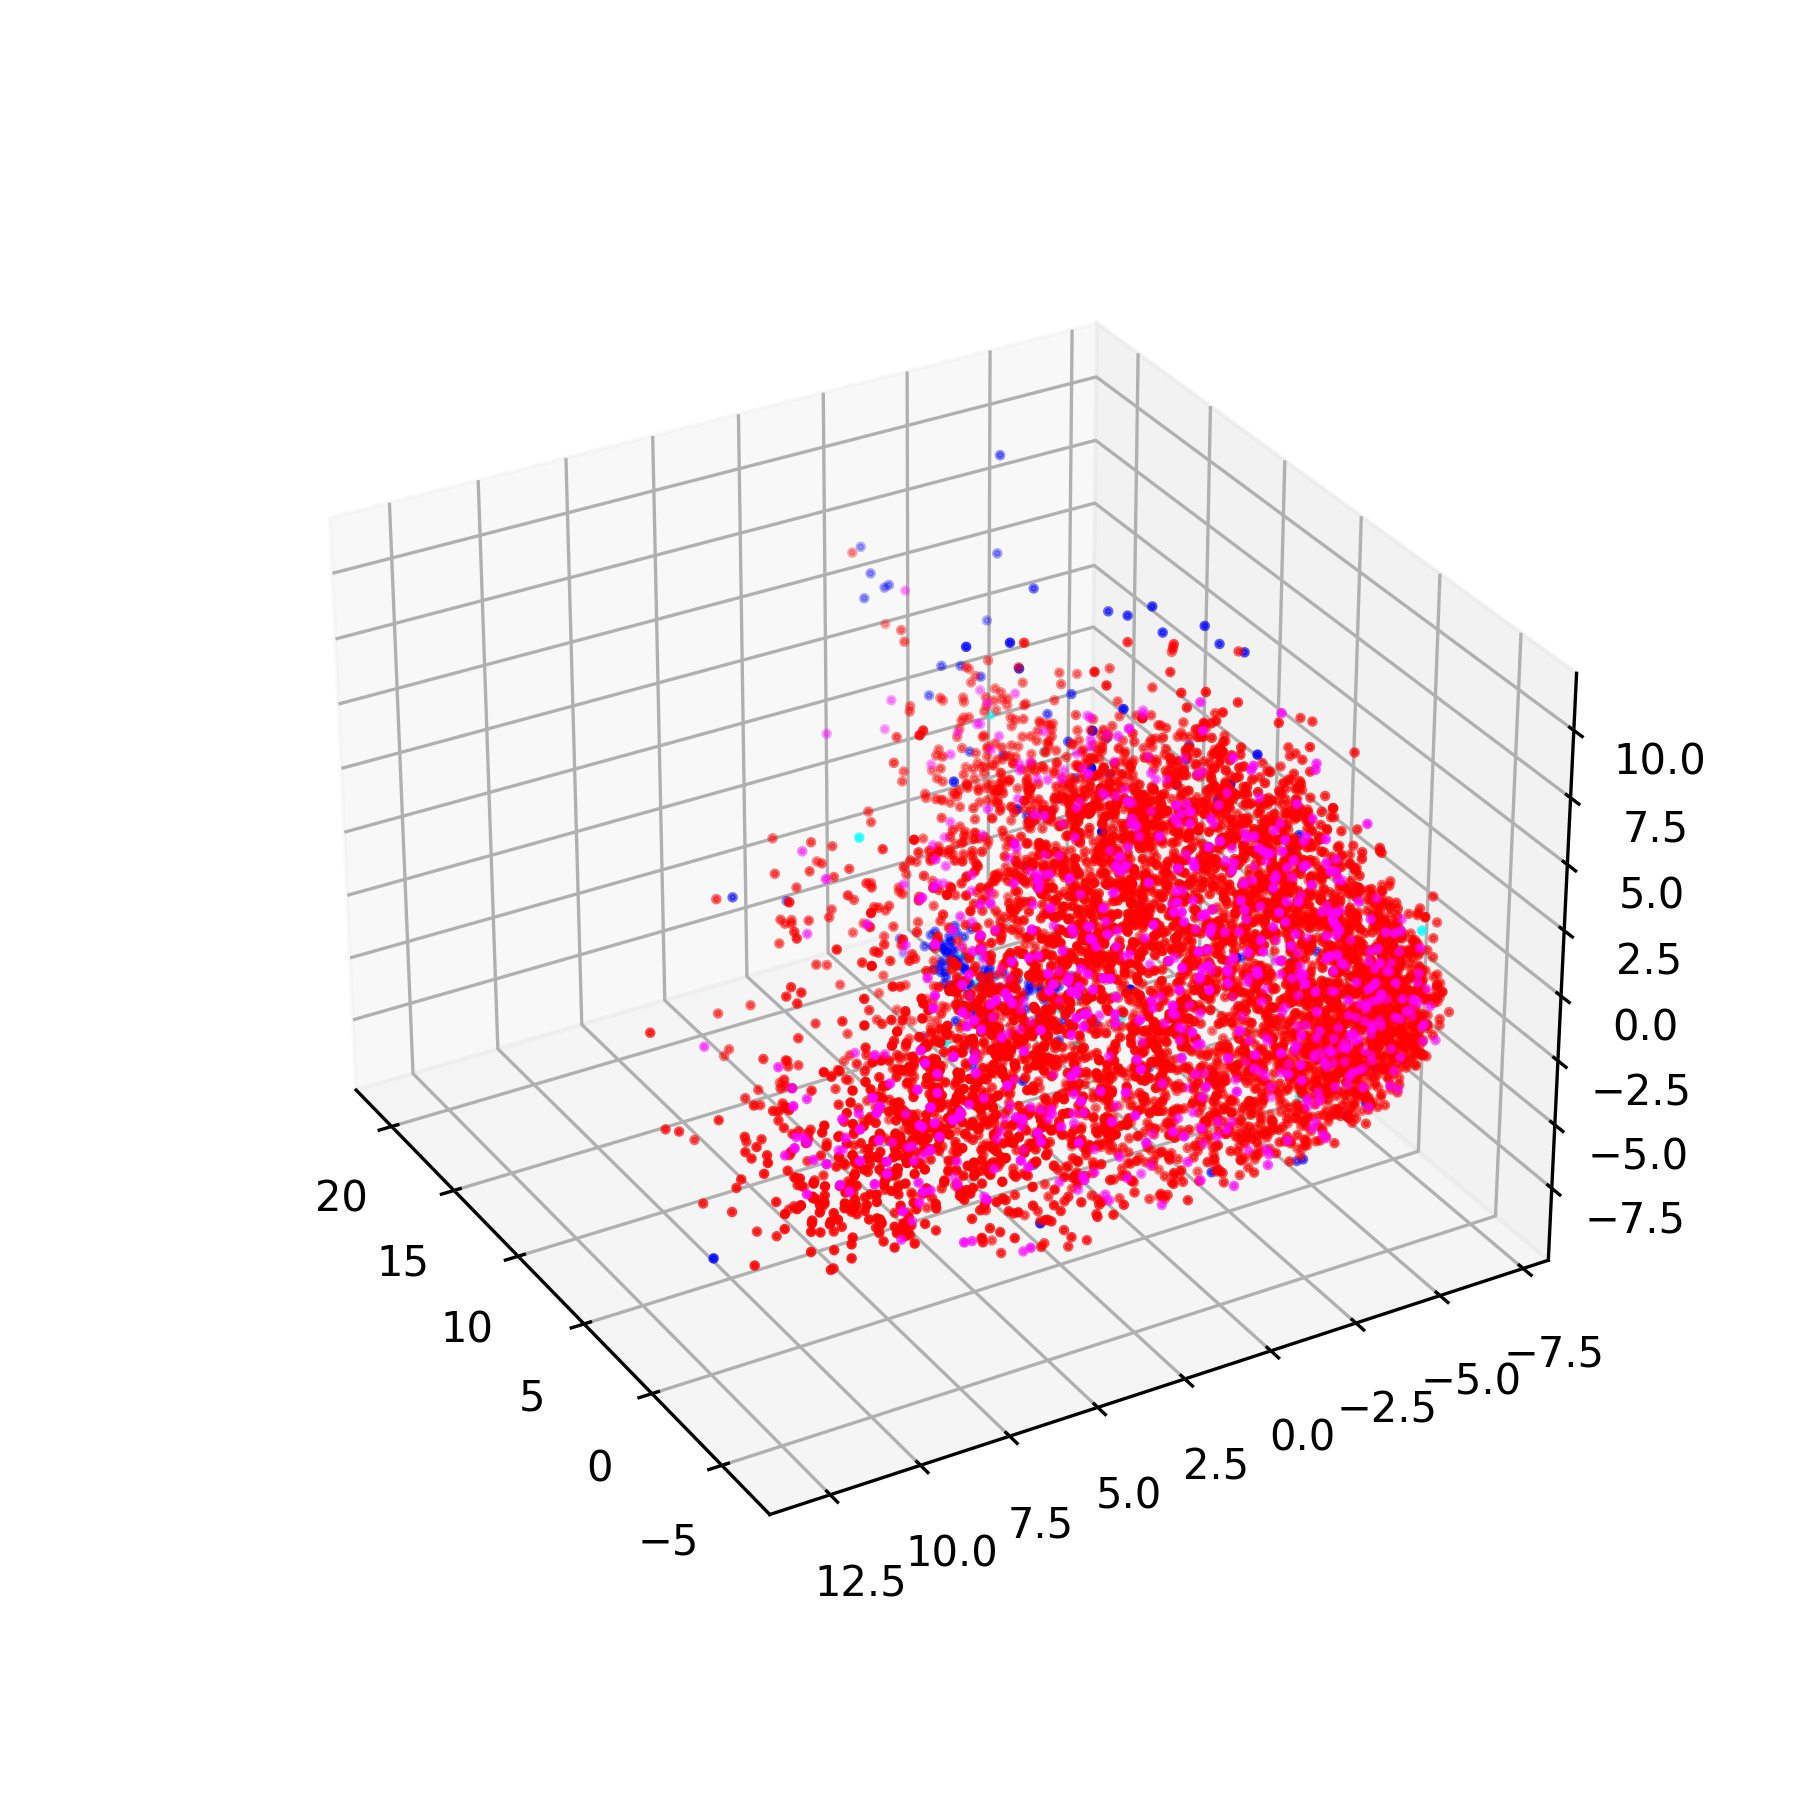

In [9]:
# picture
all_single = draw_all(singleDF, 150)
all_multi = draw_all(multiDF, 150)

In [10]:
# save
ani_single.save('./result/single_task_'+str(task_idx)+'.gif', fps=30)
ani_multi.save('./result/multi_task_'+str(task_idx)+'.gif', fps=30)

inactive_single.savefig('./result/single_task_'+str(task_idx)+'_inactive.jpg', dpi=300)
active_single.savefig('./result/single_task_'+str(task_idx)+'_active.jpg', dpi=300)
inactive_multi.savefig('./result/multi_task_'+str(task_idx)+'_inactive.jpg', dpi=300)
active_multi.savefig('./result/multi_task_'+str(task_idx)+'_active.jpg', dpi=300)

train_single.savefig('./result/single_task_'+str(task_idx)+'_train.jpg', dpi=300)
test_single.savefig('./result/single_task_'+str(task_idx)+'_test.jpg', dpi=300)
train_multi.savefig('./result/multi_task_'+str(task_idx)+'_train.jpg', dpi=300)
test_multi.savefig('./result/multi_task_'+str(task_idx)+'_test.jpg', dpi=300)

all_single.savefig('./result/single_task_'+str(task_idx)+'_activei-inactive.jpg', dpi=300)
all_multi.savefig('./result/multi_task_'+str(task_idx)+'_active-inactive.jpg', dpi=300)

MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


In [11]:
# distance
import math
from sklearn.metrics import silhouette_score

def inter_cluster_distance(dataframe, domain1, domain2, label1, label2):
    A = dataframe[(dataframe['domain']==domain1) & (dataframe['label']==label1)][['pc1','pc2','pc3']]
    B = dataframe[(dataframe['domain']==domain2) & (dataframe['label']==label2)][['pc1','pc2','pc3']]
    
    dis = 0
    for (a1,a2,a3) in zip(A['pc1'], A['pc2'], A['pc3']):
        for (b1,b2,b3) in zip(B['pc1'], B['pc2'], B['pc3']):
            dis += math.dist([a1,a2,a3],[b1,b2,b3])
    dis /= (len(A)*len(B))
    
    print("{0}-{1}_{2}-{3}: {4}".format(domain1,domain2,label1,label2,dis))
    
def get_silhouette_score(dataframe, domain1, domain2, label1, label2):
    dataA = dataframe[(dataframe['domain']==domain1) & (dataframe['label']==label1)][['pc1','pc2','pc3']]
    dataB = dataframe[(dataframe['domain']==domain2) & (dataframe['label']==label2)][['pc1','pc2','pc3']]
    data = pd.concat([dataA,dataB])
    
    labelA = dataframe[(dataframe['domain']==domain1) & (dataframe['label']==label1)]['domain' if domain1!=domain2 else 'label']
    labelB = dataframe[(dataframe['domain']==domain2) & (dataframe['label']==label2)]['domain' if domain1!=domain2 else 'label']
    label = pd.concat([labelA,labelB])
    
    score = silhouette_score(data, label)
    
    print("{0}-{1}_{2}-{3}: {4} {5}".format(domain1,domain2,label1,label2,score, 1-score))
    
def get_central_distance(dataframe, domain1, domain2, label1, label2):
    A = dataframe[(dataframe['domain']==domain1) & (dataframe['label']==label1)][['pc1','pc2','pc3']]
    B = dataframe[(dataframe['domain']==domain2) & (dataframe['label']==label2)][['pc1','pc2','pc3']]
    a = [A['pc1'].mean(), A['pc2'].mean(), A['pc3'].mean()]
    b = [B['pc1'].mean(), B['pc2'].mean(), B['pc3'].mean()]
    
    dis = math.dist(a,b)
    
    print("{0}-{1}_{2}-{3}: {4}".format(domain1,domain2,label1,label2,dis))

In [12]:
# inter cluster distance
print('================Single================')
inter_cluster_distance(singleDF, 'train', 'test', 0, 0)
inter_cluster_distance(singleDF, 'train', 'test', 1, 1)
inter_cluster_distance(singleDF, 'train', 'train', 0, 1)
inter_cluster_distance(singleDF, 'test', 'test', 0, 1)
print('================Multi================')
inter_cluster_distance(multiDF, 'train', 'test', 0, 0)
inter_cluster_distance(multiDF, 'train', 'test', 1, 1)
inter_cluster_distance(multiDF, 'train', 'train', 0, 1)
inter_cluster_distance(multiDF, 'test', 'test', 0, 1)

================Single================
train-test_0-0: 9.702484225207579
train-test_1-1: 17.541622428979704
train-train_0-1: 22.58091229682038
test-test_0-1: 22.40159755986455
================Multi================
train-test_0-0: 9.69621870068533
train-test_1-1: 8.10278553157819
train-train_0-1: 11.80019916977188
test-test_0-1: 11.257707873696903


In [13]:
# silhouette score
print('================Single================')
get_silhouette_score(singleDF, 'train', 'test', 0, 0)
get_silhouette_score(singleDF, 'train', 'test', 1, 1)
get_silhouette_score(singleDF, 'train', 'train', 0, 1)
get_silhouette_score(singleDF, 'test', 'test', 0, 1)
print('================Multi================')
get_silhouette_score(multiDF, 'train', 'test', 0, 0)
get_silhouette_score(multiDF, 'train', 'test', 1, 1)
get_silhouette_score(multiDF, 'train', 'train', 0, 1)
get_silhouette_score(multiDF, 'test', 'test', 0, 1)

================Single================
train-test_0-0: 0.005298764444887638 0.9947012355551124
train-test_1-1: 0.02049456723034382 0.9795054327696562
train-train_0-1: 0.5570726990699768 0.4429273009300232
test-test_0-1: 0.5525164604187012 0.44748353958129883
================Multi================
train-test_0-0: 0.00121218990534544 0.9987878100946546
train-test_1-1: -0.09297730773687363 1.0929773077368736
train-train_0-1: 0.15860630571842194 0.8413936942815781
test-test_0-1: 0.1179647296667099 0.8820352703332901


In [14]:
# centroid distance
print('================Single================')
get_central_distance(singleDF, 'train', 'test', 0, 0)
get_central_distance(singleDF, 'train', 'test', 1, 1)
get_central_distance(singleDF, 'train', 'train', 0, 1)
get_central_distance(singleDF, 'test', 'test', 0, 1)
print('================Multi================')
get_central_distance(multiDF, 'train', 'test', 0, 0)
get_central_distance(multiDF, 'train', 'test', 1, 1)
get_central_distance(multiDF, 'train', 'train', 0, 1)
get_central_distance(multiDF, 'test', 'test', 0, 1)

================Single================
train-test_0-0: 0.22824338983821554
train-test_1-1: 1.5566549869919166
train-train_0-1: 18.509282507355767
test-test_0-1: 17.88650669237126
================Multi================
train-test_0-0: 0.15499623537198637
train-test_1-1: 1.5901057789895505
train-train_0-1: 7.150691079366209
test-test_0-1: 7.362464611495147


In [ ]:
exit()